## Dataset Importing
Our dataset is about the CO2 emissions of all the cars that came out in 2013. the source of our dataset is [European Environment Agency's data hub](https://www.eea.europa.eu/data-and-maps/data/co2-cars-emission-20)

We download the above dataset, read its csv and store in a `df` variable and rename its columns to increase the readablity of that. **the name of columns** have been extracted from **"Guidelines on the monitoring and reporting of CO2 emissions from light-duty vehicles"**.

## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


df = pd.read_csv("./dataset/CO2_passenger_cars_v8.csv", na_values=[' '], low_memory=False)
df = df.set_index('id')

column_names = { 
    "MS": "member_state",
    "MP": "mp",
    "Mh": "mh",
    "MAN": "man",
    "MMS": "mms",
    "TAN": "type_approval_number",
    "T": "type",
    "Va": "variant",
    "Ve": "version",
    "Mk": "make",
    "Cn": "commercial_name",
    "Ct": "category",
    "r": "registration",
    "e (g/km)": "emission", # Min = 0, Max = 700
    "m (kg)": "mass", # Min = 300, Max = 5000
    "w (mm)": "wheelbase", # Min = 500, Max = 6000
    "at1 (mm)": "at1", # Min = 500, Max = 3000
    "at2 (mm)": "at2", # Min = 500, Max = 3000
    "Ft": "fuel_type",
    "Fm": "fuel_mode",
    "ec (cm3)": "engine_capacity",
    "ep (KW)": "engine_power",
    "z (Wh/km)": "electric_energy_consumption",
    "IT": "eco_innovations", # Min = 3
    "Er (g/km)": "emissions_reduction", #"emissions reduction due to an innovative technology",
}


df = df.rename(columns=column_names)

Check out the columns' **Non-null count** and **Dtype**:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442475 entries, 1 to 442475
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_state                 442475 non-null  object 
 1   mp                           351252 non-null  object 
 2   mh                           442475 non-null  object 
 3   man                          442475 non-null  object 
 4   mms                          401876 non-null  object 
 5   type_approval_number         414056 non-null  object 
 6   type                         439245 non-null  object 
 7   variant                      428295 non-null  object 
 8   version                      417864 non-null  object 
 9   make                         422174 non-null  object 
 10  commercial_name              441330 non-null  object 
 11  category                     442470 non-null  object 
 12  registration                 442475 non-null  int64  
 13  emis

### Cleaning Qualitative Columns

Some problems like the following cases have been observed in the qalitative columns (non-number columns with types such as object, string, category):

- **Typos:**  `'MERCDES BENZ'`
- **Labels with double spaces between them:** `'VOLKSWAGEN,  VW'`
- **Multi-label for one entity:**     `'ASTON-MARTIN'` and `'ASTONMARTIN'` will be replaced with `'ASTON MARTIN'`
- **Non standard characters in labels:** `?` in `'DODGE?'`
- ...



In [31]:
make_values = {
    'ASTON-MARTIN': 'ASTON MARTIN',
    'ASTONMARTIN': 'ASTON MARTIN',

    'AUTOMOBILES PEUGEOT': 'PEUGEOT',

    'BMW AG': 'BMW',
    'BMW I': 'BMW',

    'CHRVROLET': 'CHEVROLET',

    'CITROËN': 'CITROEN',

    'DAIMLER AG': 'DAIMLER',

    'DODGE (USA)': 'DODGE',
    'DODGE?': 'DODGE',

    'DONKERVOORT': 'DONKERVOORT(JD)',

    'FISKER AUTOMOTIVE INC.': 'FISKER',

    'FORD (D)': 'FORD',
    'FORD - CNG-TECHNIK': 'FORD',
    'FORD-CNG-TECHNIK': 'FORD',

    'GENERAL MOTORS COMPANY': 'GMC',

    'JAGUAR CARS LIMITED': 'JAGUAR CARS',
    'JAGUAR': 'JAGUAR CARS',

    'JAGUAR LAND ROVER LIMITED': 'JAGUAR LAND ROVER',
    'JAGUAR LAND ROVER LTD': 'JAGUAR LAND ROVER',
    'JAGUAR LAND ROVERLIMITED': 'JAGUAR LAND ROVER',

    'KIA MOTOR': 'KIA',

    'LADA - VAZ': 'LADA-VAZ',
    'LADA': 'LADA-VAZ',

    'LAND ROVER LD': 'LAND ROVER', 
    'LANDROVER ': 'LAND ROVER',

    'MAHINDRA LTD.': 'MAHINDRA',

    'MC LAREN': 'MCLAREN',
    
    'MERCEDES-BENZ': 'MERCEDES BENZ',
    'MERCEDES BENZ': 'MERCEDES BENZ',
    'MERCDES BENZ': 'MERCEDES BENZ',
    'MERCEDES AMG': 'MERCEDES BENZ',
    'MERCEDES-AMG': 'MERCEDES BENZ',
    'MERCEDES': 'MERCEDES BENZ',

    'MITSUBISHI MOTORS CORPORATION': 'MITSUBISHI',
    'MITSUBISHI (J)': 'MITSUBISHI',
    'MITSUBISHI (THA)': 'MITSUBISHI MOTORS THAILAND',

    'MORGAN': 'MORGAN MOTOR',

    'OLKSWAGEN': 'VOLKSWAGEN VW',
    'OLKSWAGEN VW': 'VOLKSWAGEN VW',

    'VOLKSWAGEN,  VW': 'VOLKSWAGEN VW',
    'VOLKSWAGEN, VW': 'VOLKSWAGEN VW',
    'VOLKSWAGEN  COMM': 'VOLKSWAGEN VW',
    'VOLKSWAGEN,VW': 'VOLKSWAGEN VW',
    'VOLKSWAGENVW': 'VOLKSWAGEN VW',
    'VOLKSWAGEN': 'VOLKSWAGEN VW',
    
    'PEUGOT': 'PEUGEOT',
    'AUTOMOBILES PEUGEOT': 'PEUGEOT',

    'PORCHE': 'PORSCHE',

    'QUATRO': 'QUATTRO',

    'ROLLS-ROYCE': 'ROLLS ROYCE',

    'ROVER': 'ROVER CARS',

    'SSANG YONG': 'SSANGYONG',
    'SSANGJONG': 'SSANGYONG',

    'SUZUKI MOTOR CORPORATION': 'SUZUKI',
    'TESLA': 'TESLA MOTORS',
}

df.make = df.make.str.upper() # A few of labels are lowercase while the majority are upperase. convert all of them to uppercase
df.make = df.make.replace(make_values) # Correct the observed problms

df.mh = df.mh.str.strip() # Remove space from begining or end of srings like 'ROLLS ROYCE '

df.fuel_type = df.fuel_type.str.upper() # A few of labels are lowercase while the majority are upperase. convert all of them to uppercase

df.man = df.man.str.strip() # Remove space from the end of strings such as 'JAGUAR LAND ROVER LIMITED '
df.fuel_type = df.fuel_type.str.strip()


# Set the right types to the columns:

df.member_state = df.member_state.astype('category')
df.mh = df.mh.astype('category')
df.type = df.type.astype('category') # Needs cleaning
df.variant = df.variant.astype('category') # Needs cleaning
df.version = df.version.astype('category') # Needs cleaning
df.make = df.make.astype('category') # Needs cleaning
df.commercial_name = df.commercial_name.astype('string') # This may be a good choice to drop
df.category = df.category.astype('category') # 3 categries
df.fuel_type = df.fuel_type.astype('category')
df.fuel_mode = df.fuel_mode.astype('category')
df.eco_innovations = df.eco_innovations.astype('category')

# Rename the labels to increase the readabilty during visualization
df.fuel_mode = df.fuel_mode.cat.rename_categories({'M': 'mono-fuel', 'B': 'bi-fuel', 'F': 'flex-fuel'})


## Exploration

\
The **top CO2 emission producing Europian states** are:

<Axes: xlabel='Member States', ylabel='Emission (g/km)'>

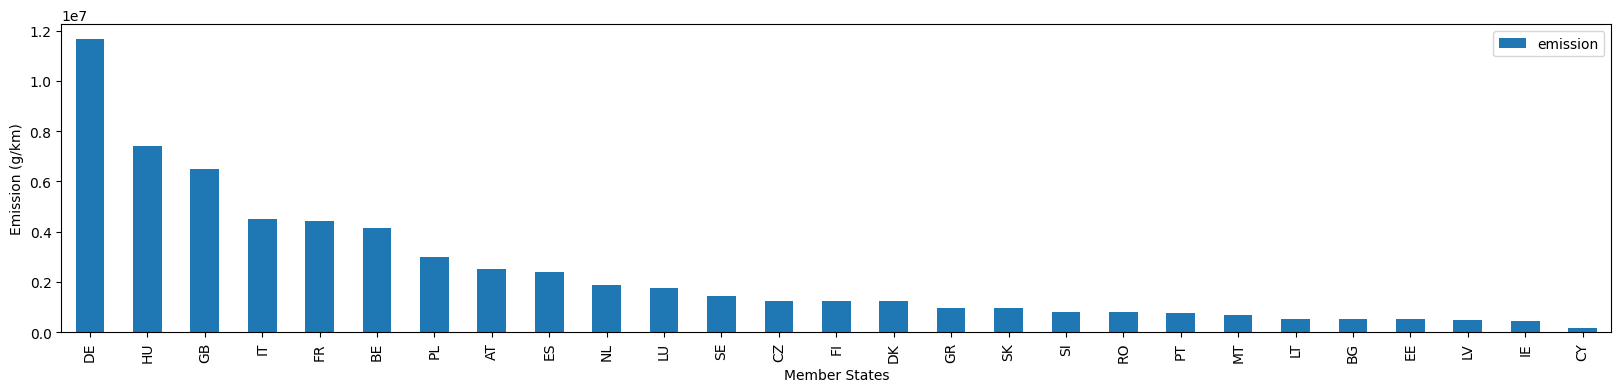

In [32]:
# Top member states as producers of emissions
grouped_ms_emission = df[['member_state', 'emission']].groupby('member_state', observed=True).sum().sort_values(by='emission', ascending=False)
grouped_ms_emission.plot(kind='bar', figsize=(20, 4), rot=90, xlabel='Member States', ylabel='Emission (g/km)')


\
\
\
The following figure demonstrates **the top car manufacturers** that their products contribute vastly in producing CO2 emission:

<Axes: xlabel='Manufacturers', ylabel='Emission (g/km)'>

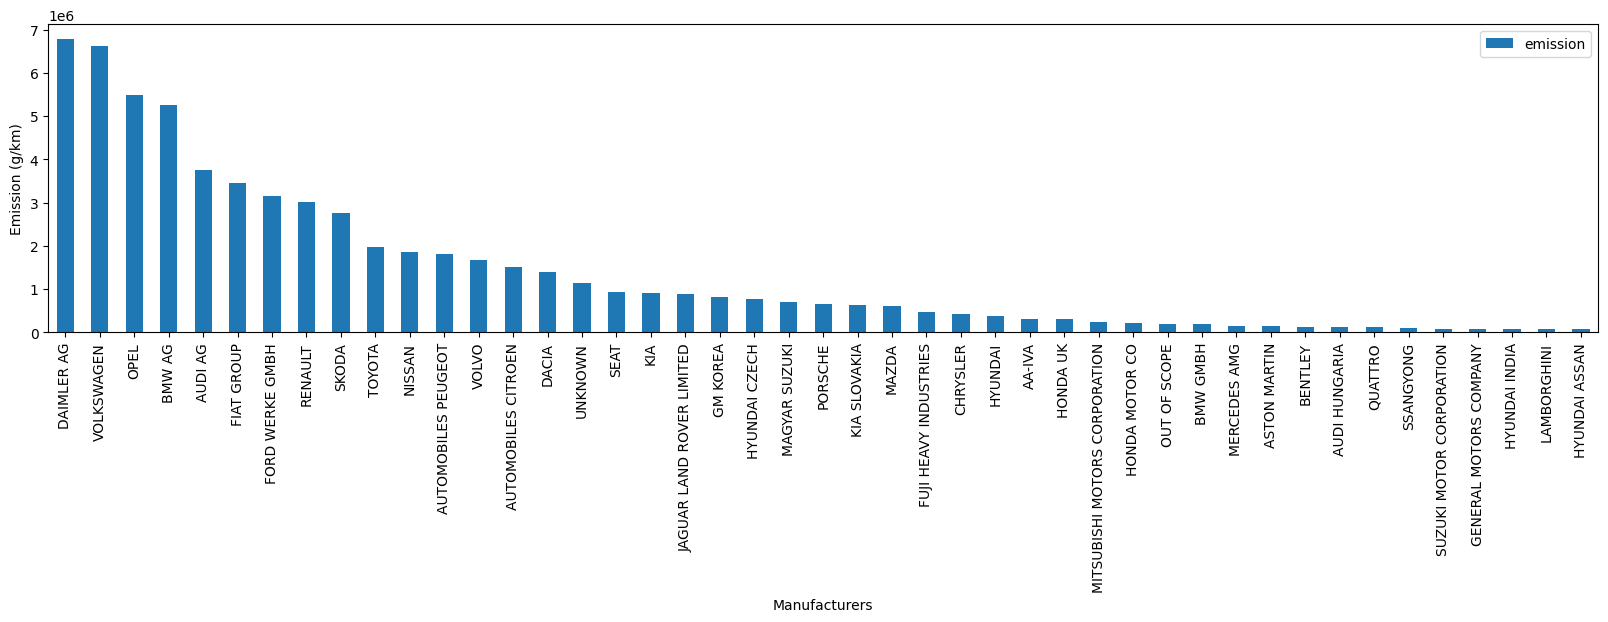

In [33]:
grouped_ms_ec = df[['mh', 'emission']].groupby('mh', observed=True).sum().sort_values(by='emission', ascending=False)
grouped_ms_ec[:45].plot(kind='bar', figsize=(20, 4), rot=90, xlabel='Manufacturers', ylabel='Emission (g/km)')

\
The **fuel types** which contribute the most in producing CO2 emission:

<Axes: xlabel='Fuel type', ylabel='Emission (g/km)'>

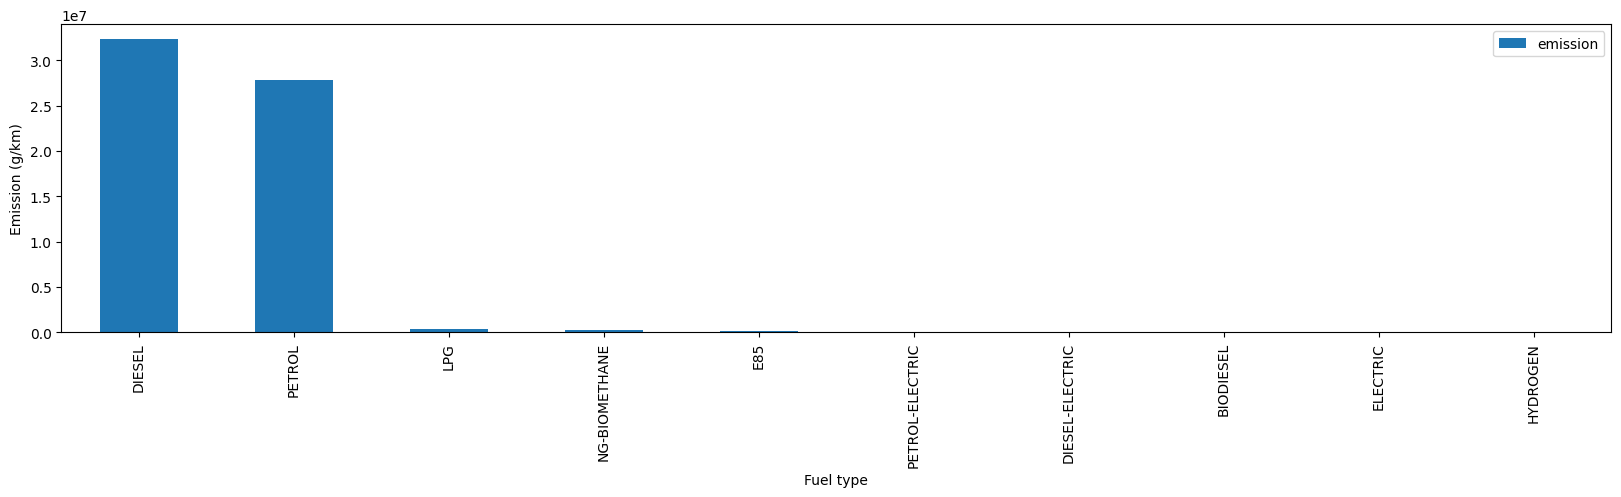

In [34]:
# Top fuel types playing a role in producing CO2 emissions
grouped_ft_emission = df[['fuel_type', 'emission']].groupby('fuel_type', observed=True).sum().sort_values(by='emission', ascending=False)
grouped_ft_emission.plot(kind='bar', figsize=(20, 4), rot=90, xlabel='Fuel type', ylabel='Emission (g/km)')

\
**The fuel modes** of vehicles involving in producing CO2 emssion:

<Axes: ylabel='Emission (g/km)'>

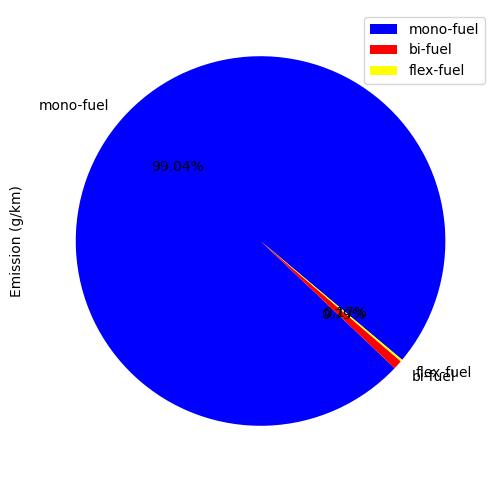

In [35]:
grouped_ft_emission = df[['fuel_mode', 'emission']].groupby('fuel_mode', observed=True).sum().sort_values(by='emission', ascending=False)

#lambda x: f"{x:.2f}%"

grouped_ft_emission.plot(
    kind='pie',
    y='emission',
    xlabel='Fuel Mode',
    ylabel='Emission (g/km)',
    figsize=(8, 6),
    autopct=lambda x: f"{x:.2f}%",
    startangle=-40,
    labeldistance=1.1,
    colors=['blue', 'red', 'yellow'],
    #explode = (0.2, 0.2, 0.4,),
    #rotatelabels=True
)


\
The **top Europian states** investing in **electric vehicles** to reducing CO2 emission:

<Axes: xlabel='Member states', ylabel='Electric Energy Consumption'>

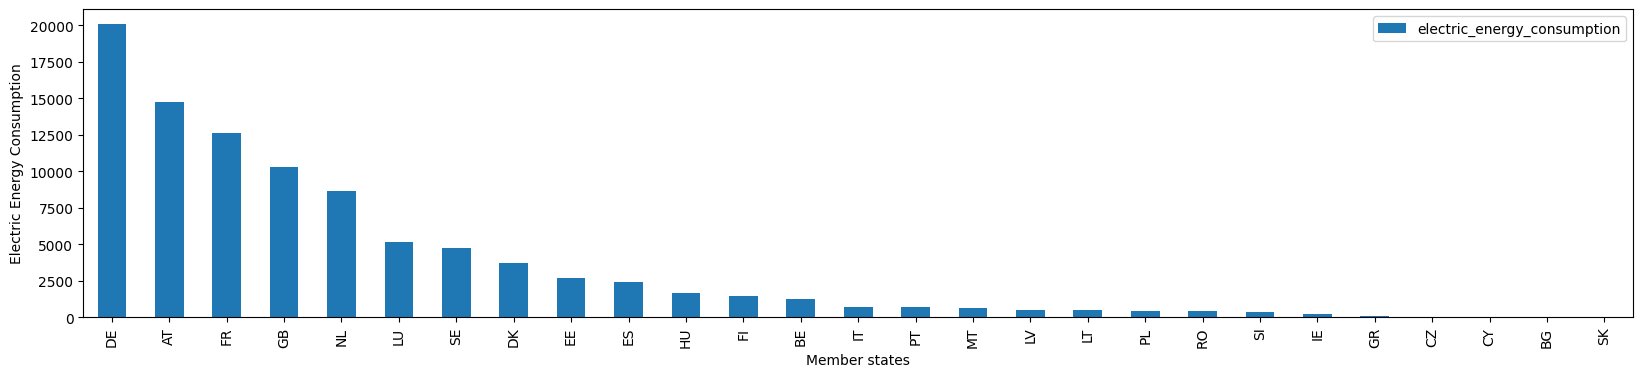

In [36]:

grouped_ms_ec = df[['member_state', 'electric_energy_consumption']].groupby('member_state', observed=True).sum().sort_values(by='electric_energy_consumption', ascending=False)
grouped_ms_ec.plot(kind='bar', figsize=(20, 4), rot=90, xlabel='Member states', ylabel='Electric Energy Consumption')


\
In the following scatter matrix, **the corr relationships** between variables are demonstrated:

C:\Users\C1\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\C1\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\C1\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


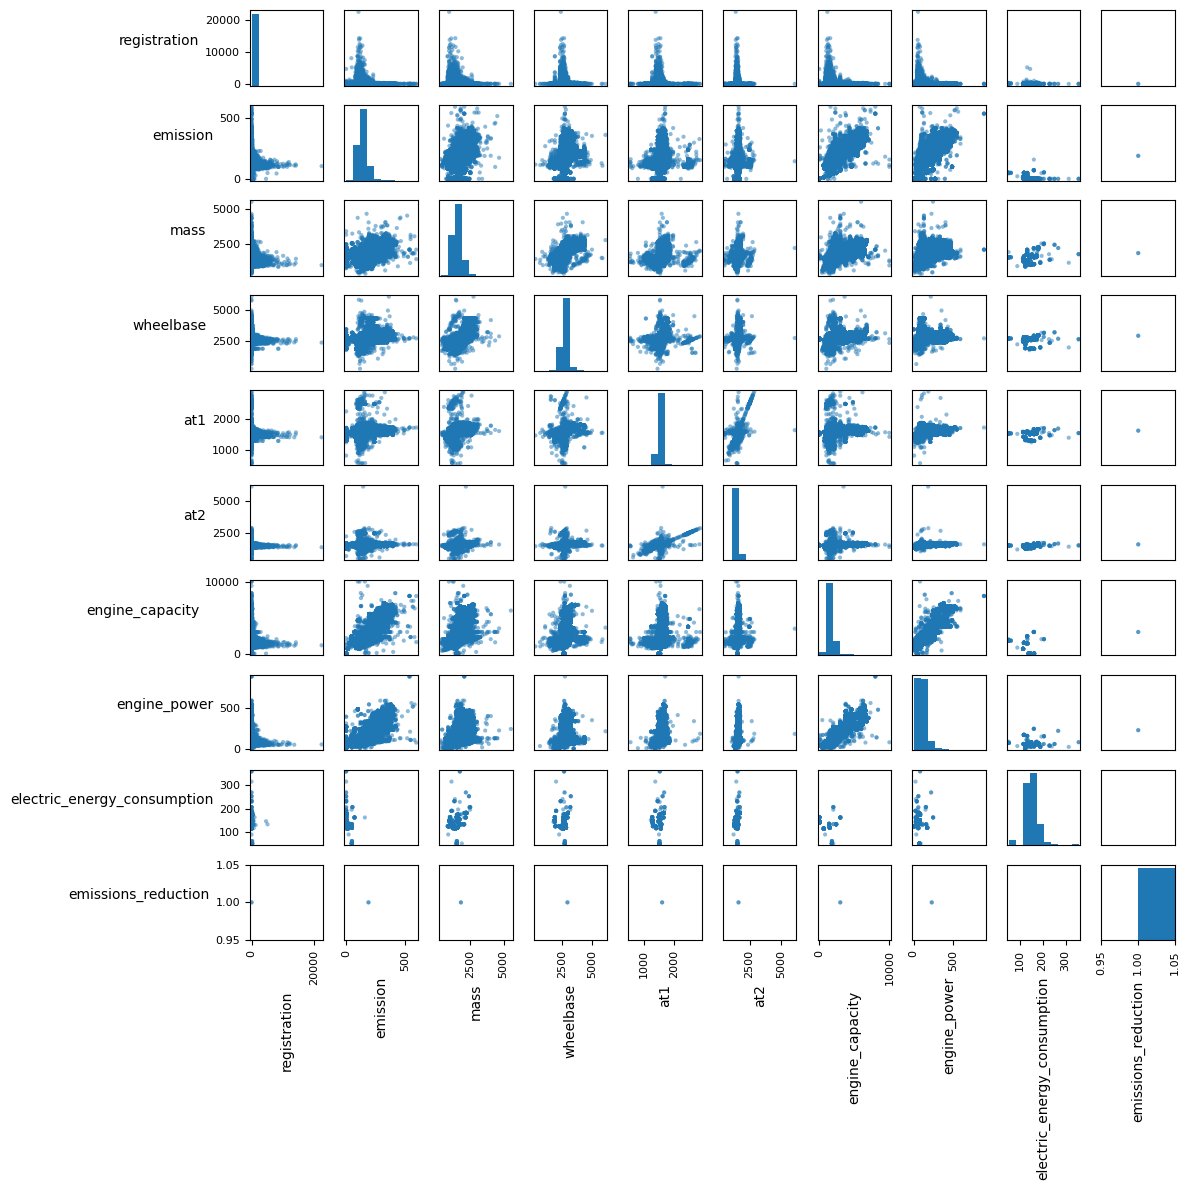

In [41]:
axes = scatter_matrix(df.select_dtypes(['int', 'float']), figsize=(12, 12))

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    # Rotate y-axis labels and align them to the right
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# # Prevent labels from being cut off
plt.tight_layout()

# # Adjust subplot spacing
# plt.gcf().subplots_adjust(wspace=0, hspace=0)

# Show the plot
plt.show()

A good corr relationship can be spotted between `mass`, `engine_capacity`, `engine_power` and our **target variable** `emission`. the weeker relationships also can be detected betwen `wheelbase`, `at1` and `emission`.


\
The correlation heatmap of quantative columns also shows that there are a strong correlation of the columns `mass`, `engine capacity` and `engine power` with `emissions`. this correlation totally makes sence as a car with higher mass, needs a more powerful engine in terms of capacity and power, that results in consuimg more fuel and emitting more CO2 emissions:

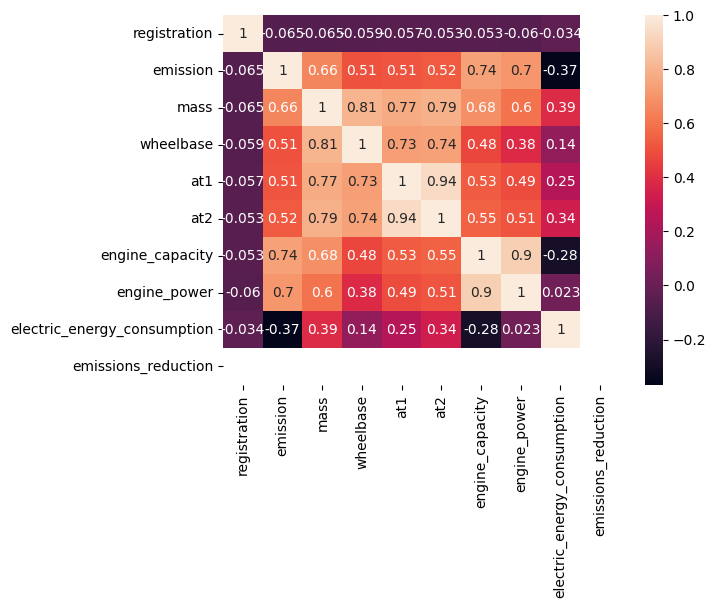

In [38]:
corr = df.select_dtypes(['int64', 'float64']).corr()
sns.heatmap(corr, annot=corr)
plt.show()

The following boxplot is giving us interesting information about extreme values in the dataset columns. some of these extreme values could be considered as outlier which are made by human as entering data in database:

<Axes: >

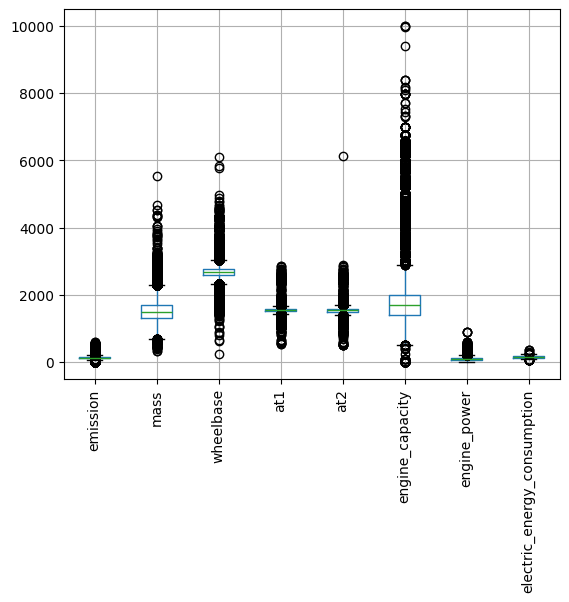

In [42]:
df[[
    'emission', 'mass', 'wheelbase', 'at1', 'at2', 'engine_capacity',
    'engine_power', 'electric_energy_consumption'
]].boxplot(rot=90)

A function is introduced belew in order to find and remove outliers using boxplot:

In [43]:
def check_outliers(colname=None, min_value=None, max_value=None, drop_outliers=True): 
    df[[colname]].boxplot()
    
    quartiles = df[colname].quantile([0, .25, .5, .75, 1])
    iqr = quartiles[.75] - quartiles[.25]       
    upper_fence = 1.5*iqr + quartiles[.75]
    lower_fence = quartiles[.25] - 1.5*iqr
               
    #plt.axhline(upper_fence, color='red', alpha=.25)
    plt.annotate(f'{upper_fence=}', xy=(1, upper_fence), xytext=(0, upper_fence),
                arrowprops=dict(facecolor='black', shrink=0.05, alpha=.2))
    
    #plt.axhline(lower_fence, color='red', alpha=.25)
    plt.annotate(f'{lower_fence=}', xy=(1, lower_fence), xytext=(0, lower_fence),
                arrowprops=dict(facecolor='black', shrink=0.05, alpha=.2))

    plt.tight_layout()
    
    print(f"Extreme values greater than upper fence: {len(df[df[colname] > upper_fence])} of {len(df)}")
    print(f"Extreme values less than lower fence: {len(df[df[colname] < lower_fence])} of {len(df)}")

    if min_value:
        min_outliers_df = df.loc[df[colname] < min_value]
        print(f"Number of outliers less than min value: {len(min_outliers_df)}")
        plt.scatter(np.ones(len(min_outliers_df[colname])), min_outliers_df[colname], marker='x', c='r')
        if drop_outliers:
            print(f"Drop the rows with `{colname}` values less than {min_value}")
            df.drop(df.loc[(df[colname] < min_value)].index, inplace=True)
    if max_value:
        max_outliers_df = df.loc[df[colname] > max_value]
        print(f"Number of outliers greater than max value: {len(max_outliers_df)}")
        plt.scatter(np.ones(len(max_outliers_df[colname])), max_outliers_df[colname], marker='x', c='r')
        if drop_outliers:
            print(f"Drop the rows with `{colname}` values greater than {max_value}")
            df.drop(df.loc[(df[colname] > max_value)].index, inplace=True)


After getting an over all imprerssion of numeric columns distribution, let's check them one by one. the first column `emission` which has a range **from 0 to 700** acording to **"Guidelines on the monitoring and reporting 
of CO2 emissions from light-duty vehicles
Version 11 – December 2019"**. as we see, the observations' distribution fits well in the range 0-700. though there are a considerable amount of extereme values, all of them are legitimate:

Extreme values greater than upper fence: 19053 of 442475
Extreme values less than lower fence: 1569 of 442475
Number of outliers greater than max value: 0
Drop the rows with `emission` values greater than 700


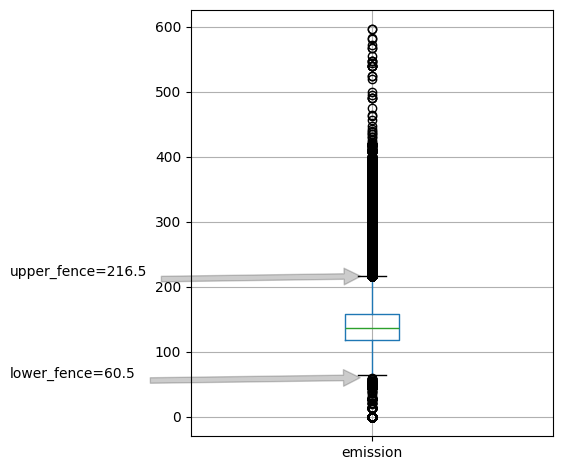

In [44]:
check_outliers('emission', min_value=0, max_value=700)

let's check the `mass` column. the mass has to have a range between **300** and **5000 kg**. the following boxplot shows that one case that its mass exceeds 5000 (it's about 5540):

Extreme values greater than upper fence: 9176 of 442475
Extreme values less than lower fence: 98 of 442475
Number of outliers less than min value: 0
Drop the rows with `mass` values less than 300
Number of outliers greater than max value: 1
Drop the rows with `mass` values greater than 5000


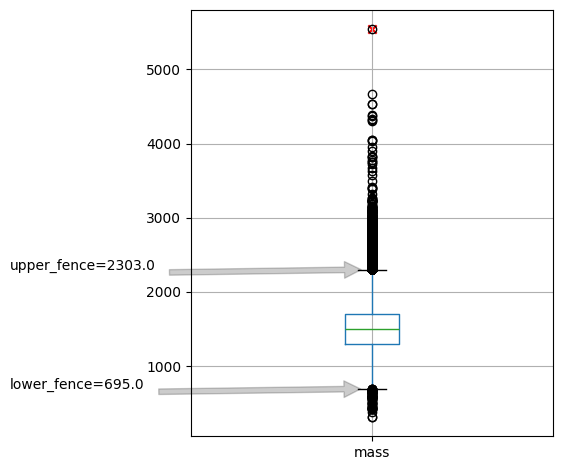

In [45]:
check_outliers('mass', min_value=300, max_value=5000)

**Wheelbase** should be in range of **500** and **6000**:

Extreme values greater than upper fence: 18929 of 442474
Extreme values less than lower fence: 11470 of 442474
Number of outliers less than min value: 1
Drop the rows with `wheelbase` values less than 500
Number of outliers greater than max value: 1
Drop the rows with `wheelbase` values greater than 6000


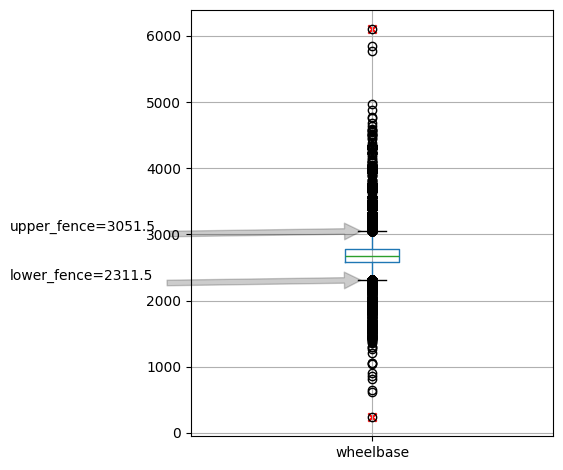

In [46]:
check_outliers('wheelbase', min_value=500, max_value=6000)

**at1** and **at2** should be between **500** and **3000**:

Extreme values greater than upper fence: 10304 of 442472
Extreme values less than lower fence: 20268 of 442472
Number of outliers less than min value: 0
Drop the rows with `at1` values less than 500
Number of outliers greater than max value: 0
Drop the rows with `at1` values greater than 3000


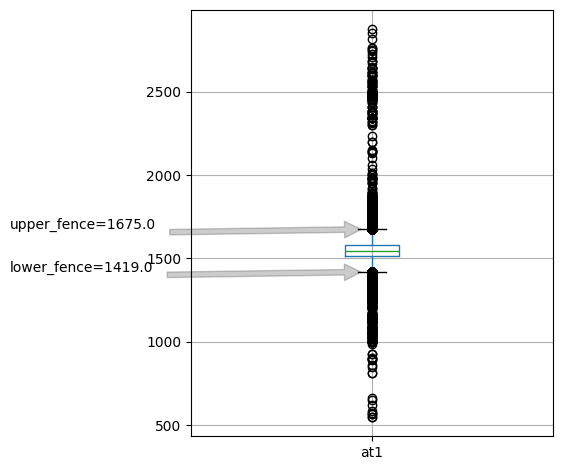

In [47]:
check_outliers('at1', min_value=500, max_value=3000)

Extreme values greater than upper fence: 7771 of 442472
Extreme values less than lower fence: 2116 of 442472
Number of outliers less than min value: 0
Drop the rows with `at2` values less than 500
Number of outliers greater than max value: 1
Drop the rows with `at2` values greater than 3000


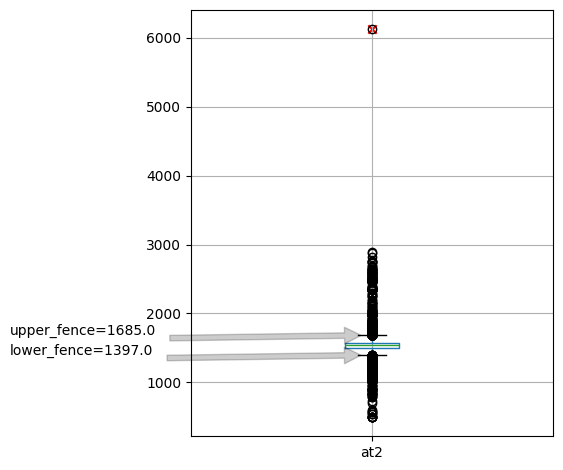

In [48]:
check_outliers('at2', min_value=500, max_value=3000)

There is no information about the maximum and minimum values in **engine_capacity** column. but there are obviously a few cases far away from the other ones on the upper-fence side of its boxplot:

Extreme values greater than upper fence: 44103 of 442471
Extreme values less than lower fence: 107 of 442471
Number of outliers greater than max value: 4
Drop the rows with `engine_capacity` values greater than 8400


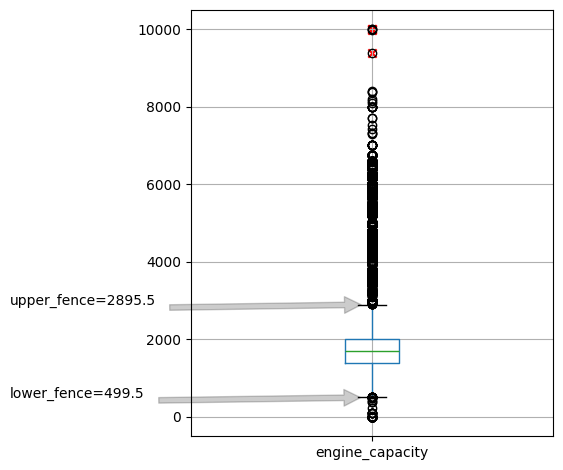

In [49]:
check_outliers('engine_capacity', min_value=0, max_value=8400)

The following boxplot shows the **engine_power**'s maximum value (**882 KW**) which is a credible value for **BUGATTI GRAND SPORT VITESSE** vehicle:

Extreme values greater than upper fence: 23586 of 442467
Extreme values less than lower fence: 0 of 442467


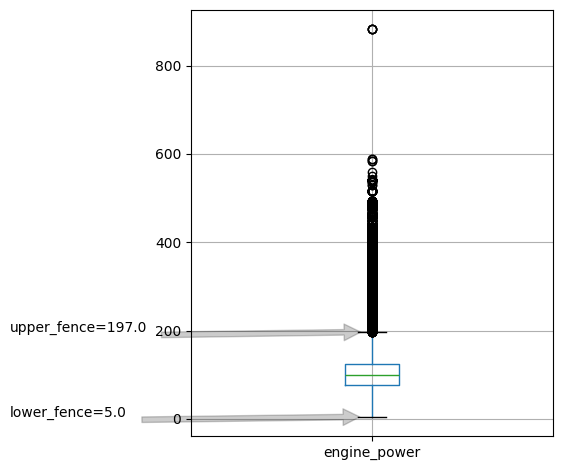

In [50]:
check_outliers('engine_power')

<Axes: >

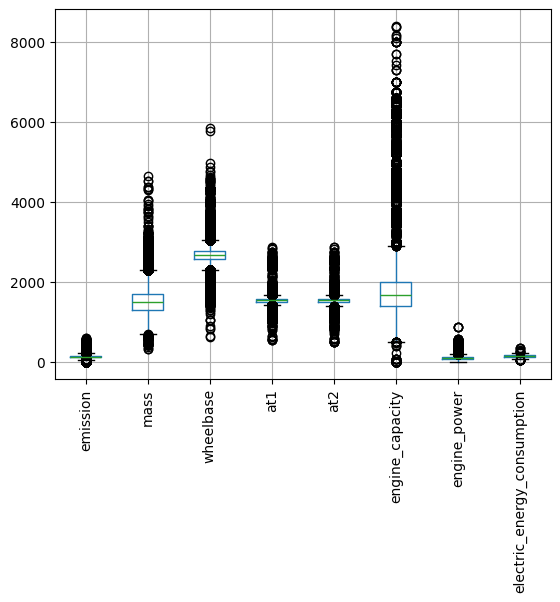

In [51]:
df[[
    'emission', 'mass', 'wheelbase', 'at1', 'at2', 'engine_capacity',
    'engine_power', 'electric_energy_consumption'
]].boxplot(rot=90)

## Missing Values

Let's introduce some useful funcuntionalities, and then take a look at the missing values distribution in our dataset:

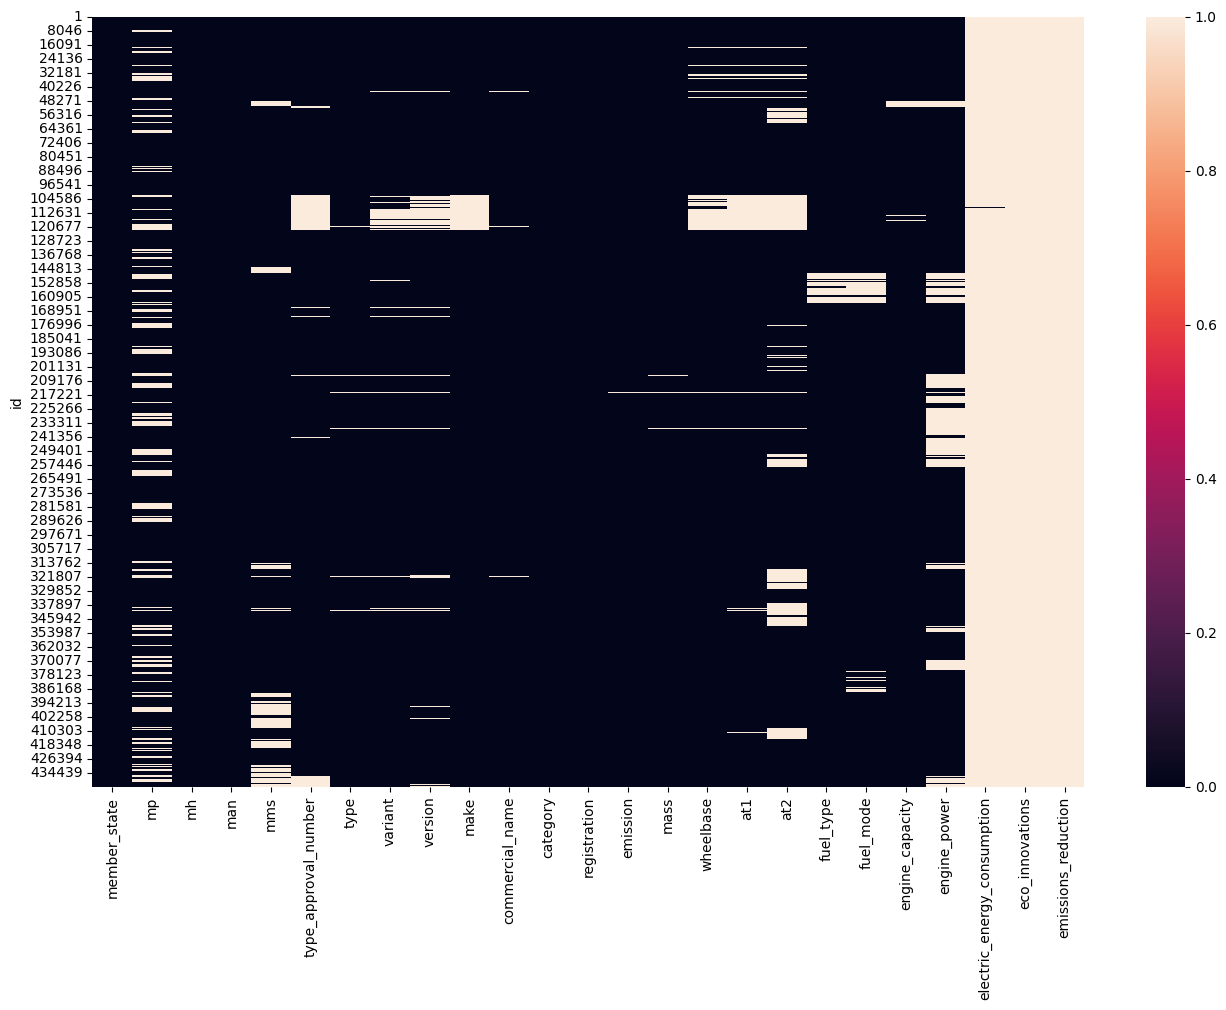

In [52]:
def plot_na_distribution(df):
    plt.figure(figsize=(16,10))
    axes = sns.heatmap(df.isna())
    plt.show()


plot_na_distribution(df)

To determine whether a column of repetitive texts can be considered a categorical variable, we need to assess the distribution of values within that column. Here are a few approaches to consider:
- Mode-Based Approach:
    - If a single text value appears most frequently in the column, it suggests that the data is categorical. The mode (most common value) represents the category.

- Count of Repeats:
    - Count how many times each text value repeats in the column.
    - If a large proportion of the values are repeated, it indicates a categorical nature.
    - For instance, if more than 50% of the values are the same, you might consider it a category.
- Distinct Values:
    - Calculate the number of unique/distinct text values in the column.
    - If there are relatively few unique values, it suggests a categorical variable.
Remember that context matters. Consider the specific dataset and the purpose of analyzing the column. If the majority of values are repetitive and represent distinct categories, you can treat it as a categorical variable.


\
Replacing missing values in some columns by methods like computing mean, mode, ... doesn't mak sence as the missing values count are too high:

In [53]:
df = df.drop('mp', axis=1) # too many missing values
df = df.drop('man', axis=1) # after cleaning extra white spaces from `mh` column, both columns are the same.
df = df.drop('make', axis=1) # the `make` column has much in common with the `mh` column.
df = df.drop('mms', axis=1) # too many missing values
df = df.drop('type_approval_number', axis=1) # too many missing values
df = df.drop('registration', axis=1) # No obvious correlation with other columns
df = df.drop('eco_innovations', axis=1) # just 2 observations in the column
df = df.drop('emissions_reduction', axis=1) # just 2 observations in the column

Though some columns can be candidates for category type columns, because of too many modalities, we may had better drop them to save pracious memory during modeling our data. We can consider a treshhold for number of modalities, for example, 100 unique values as category modalities will maybe make sence.

In [54]:

column_names = ['mh', 'type', 'variant', 'version', 'commercial_name', 'category', 'fuel_type', 'fuel_mode']

# cn: column nasme
for cn in column_names:
    total_value_counts = df[cn].count()
    unique_value_counts = len(df[cn].unique())

    value_counts = df[cn].value_counts()
    value_counts_gt_one = {key:value for key, value in value_counts.items() if value_counts[key] > 1}
    
    total_repetitive_value_counts = sum(value_counts_gt_one.values())

    print(f"🟦 {cn} column")
    print('Unique value counts (smaller, better): ',  unique_value_counts)
    print('Ratio of category values to all rows (smaller, better): ',  unique_value_counts/total_value_counts)
    print('Counts of values with repetitions grater than one (greater, better):', f"{len(value_counts_gt_one)} (of {unique_value_counts})")
    print('Ratio of non-unique values and unique values (greater, better):', len(value_counts_gt_one)/unique_value_counts)
    print('Total repetitive value counts / total values counts (greater, better) :', total_repetitive_value_counts/total_value_counts)
    print("="*80)

🟦 mh column
Unique value counts (smaller, better):  98
Ratio of category values to all rows (smaller, better):  0.00022148544411221627
Counts of values with repetitions grater than one (greater, better): 84 (of 98)
Ratio of non-unique values and unique values (greater, better): 0.8571428571428571
Total repetitive value counts / total values counts (greater, better) : 0.9999683592222697
🟦 type column
Unique value counts (smaller, better):  3237
Ratio of category values to all rows (smaller, better):  0.007369580956110355
Counts of values with repetitions grater than one (greater, better): 1878 (of 3237)
Ratio of non-unique values and unique values (greater, better): 0.5801668211306765
Total repetitive value counts / total values counts (greater, better) : 0.9969082820703127
🟦 variant column
Unique value counts (smaller, better):  12220
Ratio of category values to all rows (smaller, better):  0.028532069392234235
Counts of values with repetitions grater than one (greater, better): 7843 (

\
So given the above result, for the sake of mamory saving, dropping columns ('type', 'variant', 'version', 'commercial_name') with big numbers of unique category values doesn't seem a bad idea:

In [55]:
columns = ['type', 'variant', 'version', 'commercial_name',]

for cn in columns:
    print(f"Drop the {cn} column.")
    df.drop(cn, axis=1, inplace=True)


Drop the type column.
Drop the variant column.
Drop the version column.
Drop the commercial_name column.


Remove duplicated rows:

In [56]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(df)}")

Number of duplicated rows: 283472
Number of rows after dropping duplicates: 158995


In [58]:
# These columns have strong corr with each other. having them all missing togethr, makes it highly unlikely
# to impute a proper value to them. 
df = df.dropna(subset=['emission', 'mass', 'engine_capacity', 'engine_power'], axis=0, how='all')

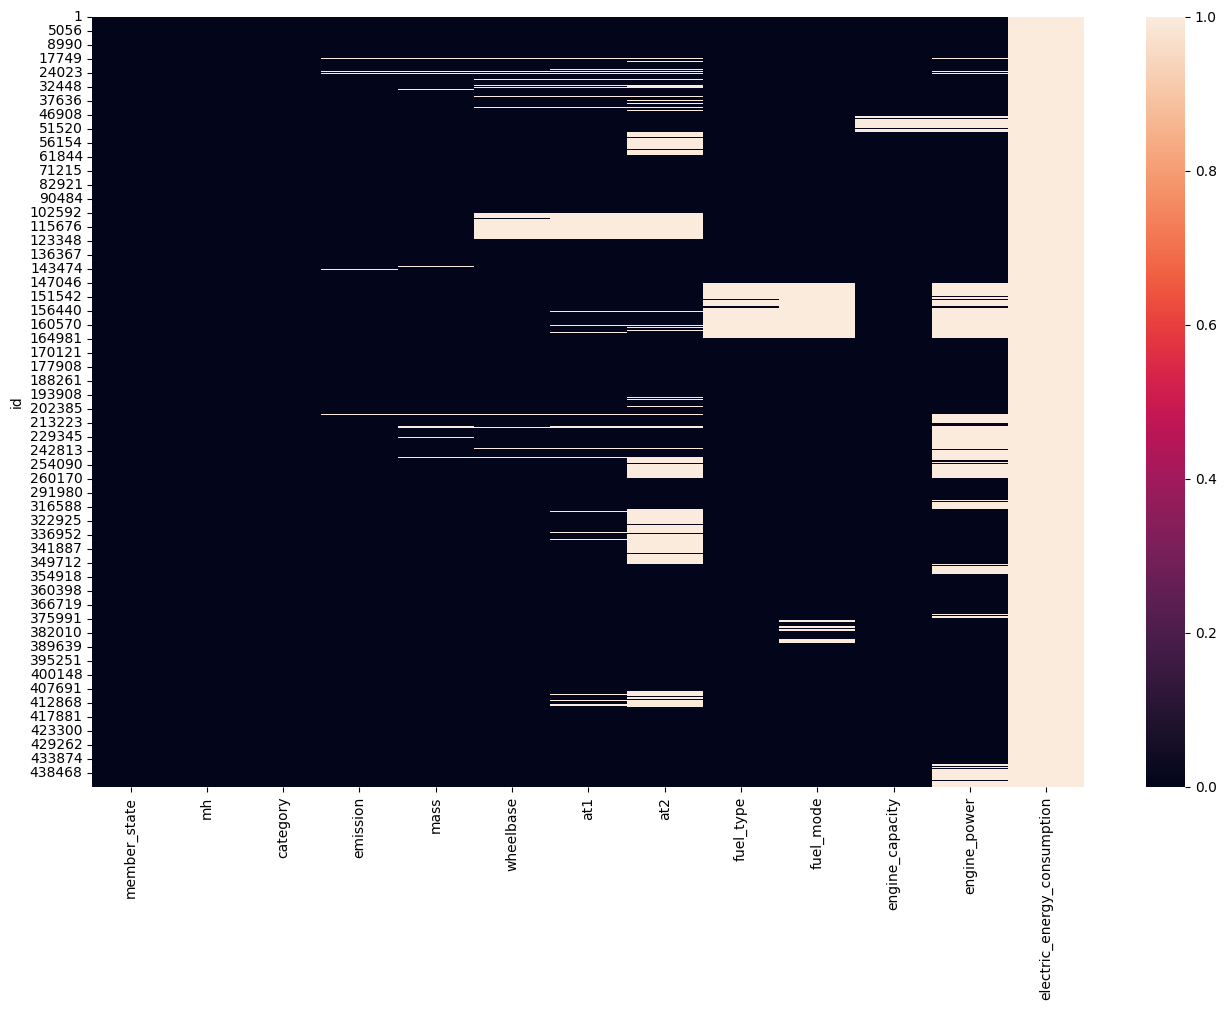

In [59]:
plot_na_distribution(df)

Some cars with non-null values in the `electric_energy_consumption` column have `PETROL` and `DIESEL` as their `fuel type`. let's rename them to `PETROL-ELECTRIC` and `DIESEL-ELECTRIC`:

In [60]:
# print(df.loc[
#     (df["electric_energy_consumption"].notnull()),
#     ["emission", "fuel_type", "electric_energy_consumption"]
# ].value_counts())

df.loc[(df['electric_energy_consumption'].notnull()) & (df['fuel_type'] == 'PETROL'), 'fuel_type'] = "PETROL-ELECTRIC"
df.loc[(df['electric_energy_consumption'].notnull()) & (df['fuel_type'] == 'DIESEL'), 'fuel_type'] = "DIESEL-ELECTRIC"


Some cars with non-null values in `electric_energy_consumption` and `emission` columns, have missing values in their `fuel_type`. we can assign `PETROL-ELECTRIC` as their fuel type:

In [61]:
# df.loc[df['electric_energy_consumption'].notnull(), 'fuel_type'].isnull().sum()
df.loc[
    (df['electric_energy_consumption'].notnull()) & (df['emission'].notnull()) & (df['fuel_type'].isnull()),
    'fuel_type'
] = 'PETROL-ELECTRIC'

In [62]:
#df.loc[(df['fuel_type'] == 'ELECTRIC') & (df['electric_energy_consumption'].isnull())]
fuel_types = ['ELECTRIC', 'PETROL-ELECTRIC', 'DIESEL-ELECTRIC']

for ft in fuel_types:
    print(f"Fuel type: `{ft}`")
    electric_energy_consumption_col = df.loc[(df['fuel_type'] == ft), 'electric_energy_consumption']
    print('Non-null values in electric_energy_consumption: ', electric_energy_consumption_col.notnull().sum())
    print('Null values in electric_energy_consumption: ', electric_energy_consumption_col.isnull().sum())
    print("electric_energy_consumption's mode: ", electric_energy_consumption_col.mode().get(0))
    print("electric_energy_consumption's mean: ", electric_energy_consumption_col.mean())
    print("-"*40)

Fuel type: `ELECTRIC`
Non-null values in electric_energy_consumption:  306
Null values in electric_energy_consumption:  204
electric_energy_consumption's mode:  173.0
electric_energy_consumption's mean:  160.69934640522877
----------------------------------------
Fuel type: `PETROL-ELECTRIC`
Non-null values in electric_energy_consumption:  51
Null values in electric_energy_consumption:  195
electric_energy_consumption's mode:  115.0
electric_energy_consumption's mean:  123.96078431372548
----------------------------------------
Fuel type: `DIESEL-ELECTRIC`
Non-null values in electric_energy_consumption:  11
Null values in electric_energy_consumption:  75
electric_energy_consumption's mode:  133.0
electric_energy_consumption's mean:  129.0909090909091
----------------------------------------


There are **204** , **195** and **75** cars respectively with **`ELECTRIC`**, **`PETROL-ELECTRIC`**  and **`DIESEL-ELECTRIC`** as their fuel type, in which the **`electric_energy_consumption`** column values are **null**. we can fill those missing values with mean or mode of the column:

In [63]:
df.loc[
    (df['fuel_type'] == 'ELECTRIC') & (df['electric_energy_consumption'].isnull()),
    'electric_energy_consumption'
] = df.loc[(df['fuel_type'] == 'ELECTRIC'), 'electric_energy_consumption'].mean()

df.loc[
    (df['fuel_type'] == 'DIESEL-ELECTRIC') & (df['electric_energy_consumption'].isnull()),
    'electric_energy_consumption'
] = df.loc[(df['fuel_type'] == 'DIESEL-ELECTRIC'), 'electric_energy_consumption'].mode()[0]

df.loc[(
    df['fuel_type'] == 'PETROL-ELECTRIC') & (df['electric_energy_consumption'].isnull()),
    'electric_energy_consumption'
] = df.loc[(df['fuel_type'] == 'PETROL-ELECTRIC'), 'electric_energy_consumption'].mode()[0]

Fill null values in the `electric_energy_consumption` column with 0 for **non-electric cars** with fuel types other than `PETROL-ELECTRIC`, `DIESEL-ELECTRIC`, `ELECTRIC`:


In [64]:
df.loc[(~df['fuel_type'].isin(['PETROL-ELECTRIC', 'DIESEL-ELECTRIC', 'ELECTRIC'])), 'electric_energy_consumption'] = 0

Pure-electric cars's engine capacity is zero because they don't consume any fossil or non-fossil fuels. so let's fill their null values with zero:

In [65]:
df.loc[(
    df['fuel_type'] == 'ELECTRIC') & (df['engine_capacity'].isnull()),
    'engine_capacity'
] = 0

In [66]:
df[df['fuel_type'] == 'ELECTRIC']

member_state                   mh category  emission    mass  \
id                                                                    
88               AT               AA-IVA       M1       0.0  1115.0   
1155             AT  AUTOMOBILES CITROEN       M1       0.0  1195.0   
1156             AT  AUTOMOBILES CITROEN       M1       0.0  1165.0   
1321             AT  AUTOMOBILES PEUGEOT       M1       0.0  1165.0   
1430             AT               BMW AG       M1       0.0  1270.0   
...             ...                  ...      ...       ...     ...   
429315           SE                VOLVO       M1       0.0  1735.0   
434849           SI                TESLA       M1       0.0  2175.0   
436162           SK  AUTOMOBILES CITROEN       M1       0.0  1195.0   
439706           SK               NISSAN       M1       0.0  1561.0   
439707           SK               NISSAN       M1       0.0  1561.0   

        wheelbase     at1     at2 fuel_type  fuel_mode  engine_capacity  \
id                                                                        
88         1971.0  1386.0  1431.0  ELECTRIC  mono-fuel              0.0   
1155       2550.0  1310.0  1270.0  ELECTRIC  mono-fuel              0.0   
1156       2550.0  1310.0  1270.0  ELECTRIC  mono-fuel              0.0   
1321       2550.0  1310.0  1270.0  ELECTRIC  mono-fuel              0.0   
1430       2570.0  1571.0  1576.0  ELECTRIC  mono-fuel              0.0   
...           ...     ...     ...       ...        ...              ...   
429315     2640.0  1535.0  1531.0  ELECTRIC  mono-fuel              0.0   
434849     2960.0  1662.0  1700.0  ELECTRIC  mono-fuel              0.0   
436162     2550.0  1310.0  1270.0  ELECTRIC  mono-fuel              0.0   
439706     2700.0  1500.0  1500.0  ELECTRIC  mono-fuel              0.0   
439707     2700.0  1570.0  1570.0  ELECTRIC  mono-fuel              0.0   

        engine_power  electric_energy_consumption  
id                                                 
88              25.0                   314.000000  
1155            35.0                   135.000000  
1156            35.0                   135.000000  
1321            35.0                   135.000000  
1430             NaN                   129.000000  
...              ...                          ...  
429315          82.0                   357.000000  
434849          69.0                   181.000000  
436162           NaN                   160.699346  
439706           NaN                   160.699346  
439707           NaN                   160.699346  

[510 rows x 13 columns]

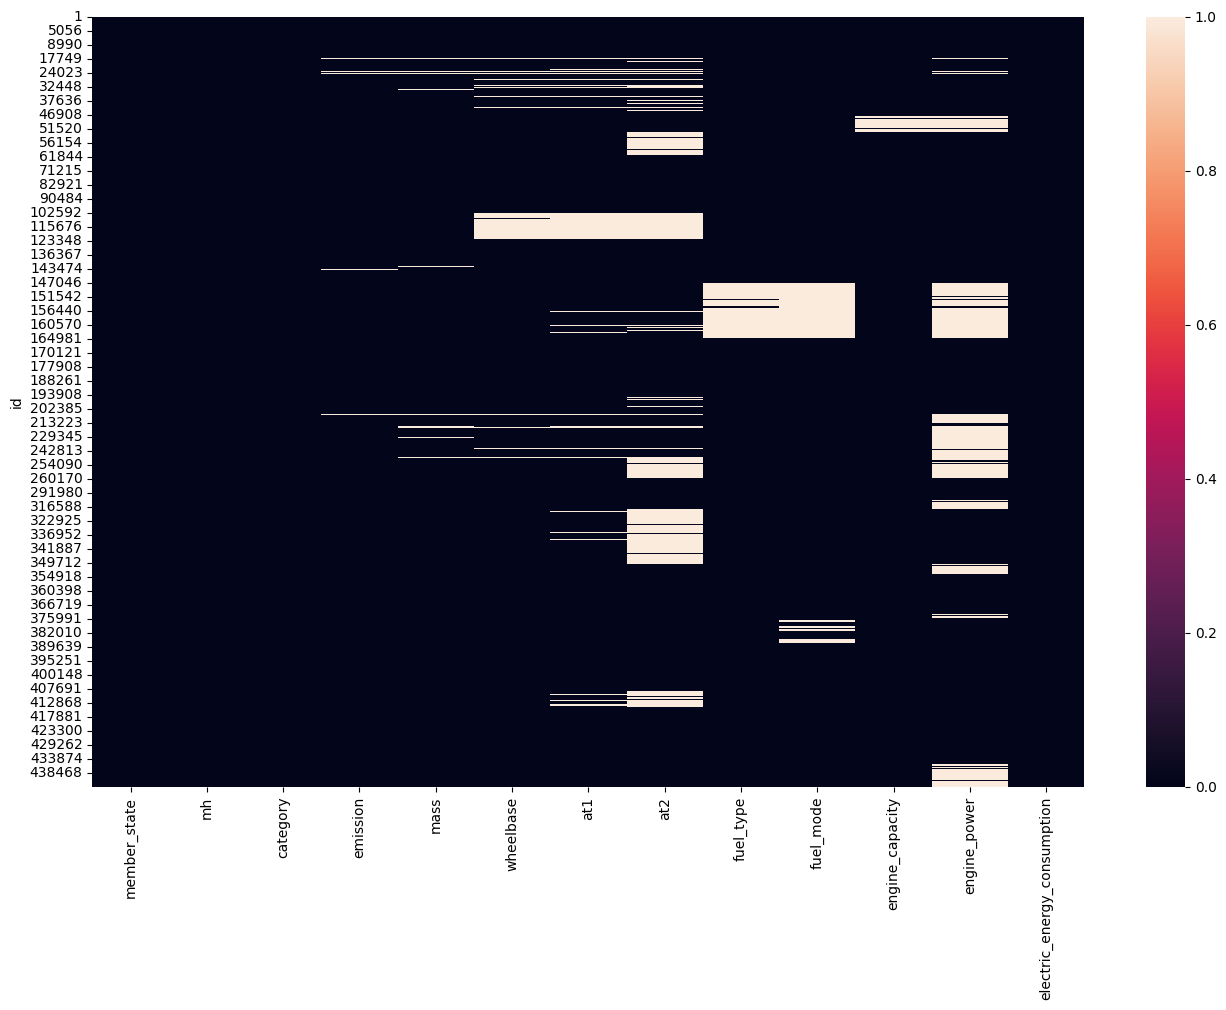

In [67]:
plot_na_distribution(df)

In [68]:
import time
from sklearn.impute import KNNImputer


columns = ['emission', 'mass', 'wheelbase', 'at1', 'at2', 'engine_capacity', 'engine_power']

null_flags_df = df[columns].isnull()

imputer = KNNImputer(n_neighbors= 4)

print("Imputing values to missing values in the mass column using KNNImputer...")

start_time = time.time()
# df transformation
#imputed_transformation = imputer.fit_transform(df[columns])
df.loc[:, columns] = imputer.fit_transform(df[columns])
processed_time = time.time() - start_time

print(f'Process time: {processed_time:,.2f} seconds')


Imputing values to missing values in the mass column using KNNImputer...
Process time: 445.10 seconds


In the following plots, we examine the distribution of new imputed data against existing data. for example, in the following `mass`-`engine_capacity` plot, the **green** data points are representing observations in which both columns `mass` and `engine_capacity` have **values**. on the other hand, the **red** points are representing observations in which both or either could be **null**

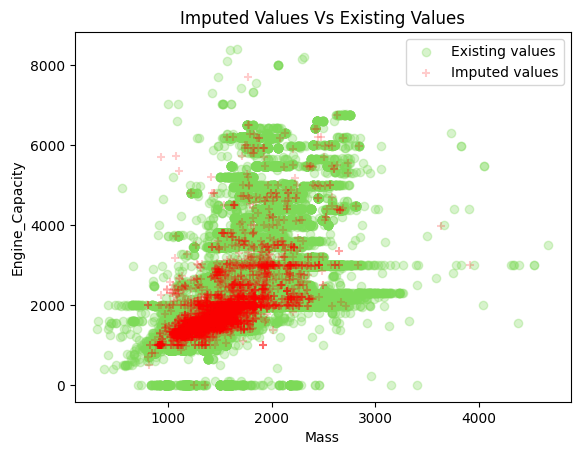

In [70]:

xname, yname = ['mass', 'engine_capacity']

nfxcol, nfycol = null_flags_df[xname], null_flags_df[yname]

# the x and y columns in which there is no missing values. (the both x and y columns have values)
xy_false_null_flags_df = null_flags_df.loc[
    (nfxcol == False) & (nfycol == False),
    [xname, yname]
]

# the x and y columns in which there is missing values (null value in x or y column or both columns)
xy_true_flags_df = null_flags_df.loc[
    (nfxcol == True) | (nfycol == True),
    [xname, yname]
]

fig, axes = plt.subplots()

##df.plot(kind='scatter', x=colx, y=coly, alpha=.3)
axes.scatter(x=df.loc[(df.index.isin(xy_false_null_flags_df.index)), xname],
             y=df.loc[(df.index.isin(xy_false_null_flags_df.index)), yname], 
             c='#7DDA58',
             alpha=.3,
             marker='o',
             label='Existing values')

axes.scatter(x=df.loc[(df.index.isin(xy_true_flags_df.index)), xname],
             y=df.loc[(df.index.isin(xy_true_flags_df.index)), yname],
             c='red',
             alpha=.2,
             marker='+',
             label='Imputed values')

axes.set_title(f"Imputed Values Vs Existing Values")
axes.set_xlabel(f"{xname.title()}")
axes.set_ylabel(f"{yname.title()}")
axes.legend()

The red imputed points' distribution shows that **imputed values correlates well with the existing green data**. let's check this for other imputed columns:

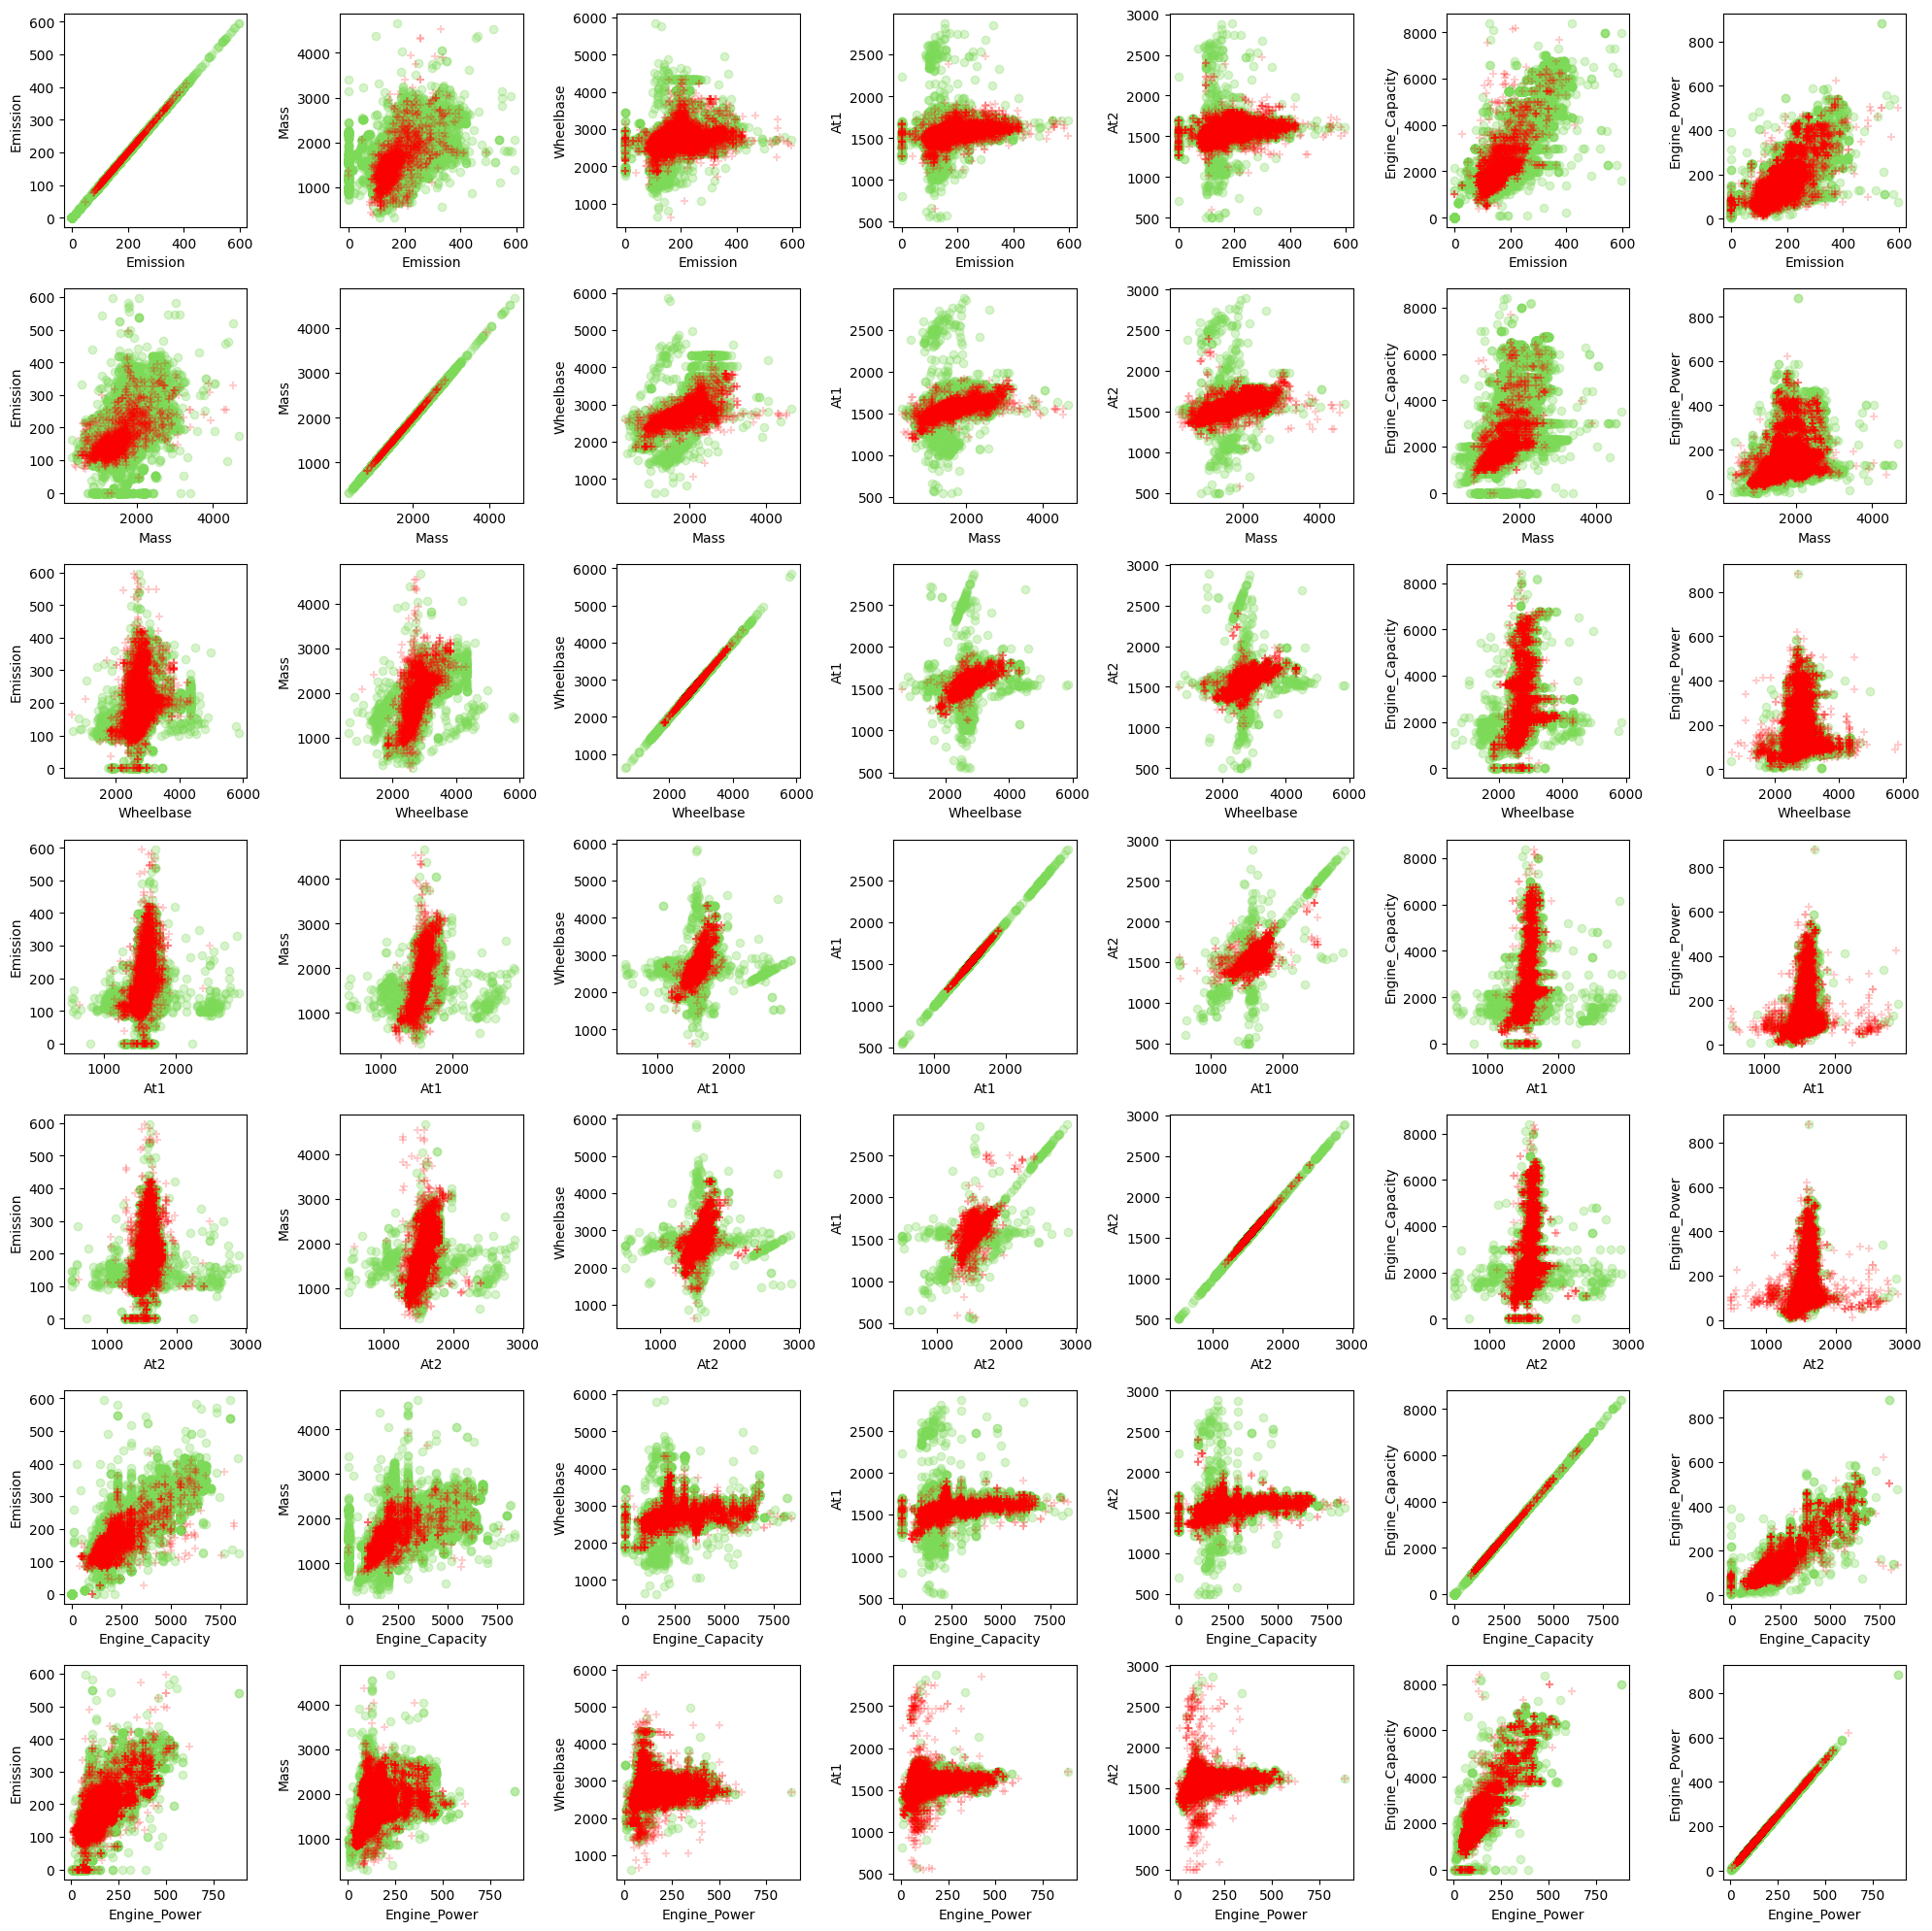

In [62]:

columns_name = ['emission', 'mass', 'wheelbase', 'at1', 'at2', 'engine_capacity', 'engine_power']

fig, axes = plt.subplots(nrows=len(columns_name), ncols=len(columns_name), figsize=(20, 20))

for i, xname in enumerate(columns_name):
    for j, yname in enumerate(columns_name):
        #print(f"{xname} vs {yname}")
        nfxcol, nfycol = null_flags_df[xname], null_flags_df[yname]

        # the x and y columns in which there is no missing values. (the both x and y columns have values)
        xy_false_null_flags_df = null_flags_df.loc[
            (nfxcol == False) & (nfycol == False),
            [xname, yname]
        ]

        # the x and y columns in which there is missing values (null value in x or y column or both columns)
        xy_true_flags_df = null_flags_df.loc[
            (nfxcol == True) | (nfycol == True),
            [xname, yname]
        ]

        ##df.plot(kind='scatter', x=colx, y=coly, alpha=.3)
        axes[i,j].scatter(x=df.loc[(df.index.isin(xy_false_null_flags_df.index)), xname],
                     y=df.loc[(df.index.isin(xy_false_null_flags_df.index)), yname], 
                     c='#7DDA58',
                     alpha=.3,
                     marker='o',
                     label='Existing values')
        
        axes[i,j].scatter(x=df.loc[(df.index.isin(xy_true_flags_df.index)), xname],
                     y=df. , yname],
                     c='red',
                     alpha=.2,
                     marker='+',
                     label='Imputed values')
        
        #axes[i,j].set_title(f"Imputed Values Vs Existing Values")
        axes[i,j].set_xlabel(f"{xname.title()}")
        axes[i,j].set_ylabel(f"{yname.title()}")
        #axes[i,j].legend()

plt.tight_layout()

We want to compare **imputed missing values** with **existing values** and find out:
- how do they look versus existing values?
- did they get proper imputed values?
- do they have correlation with existing vlaues?
- do they make sence?

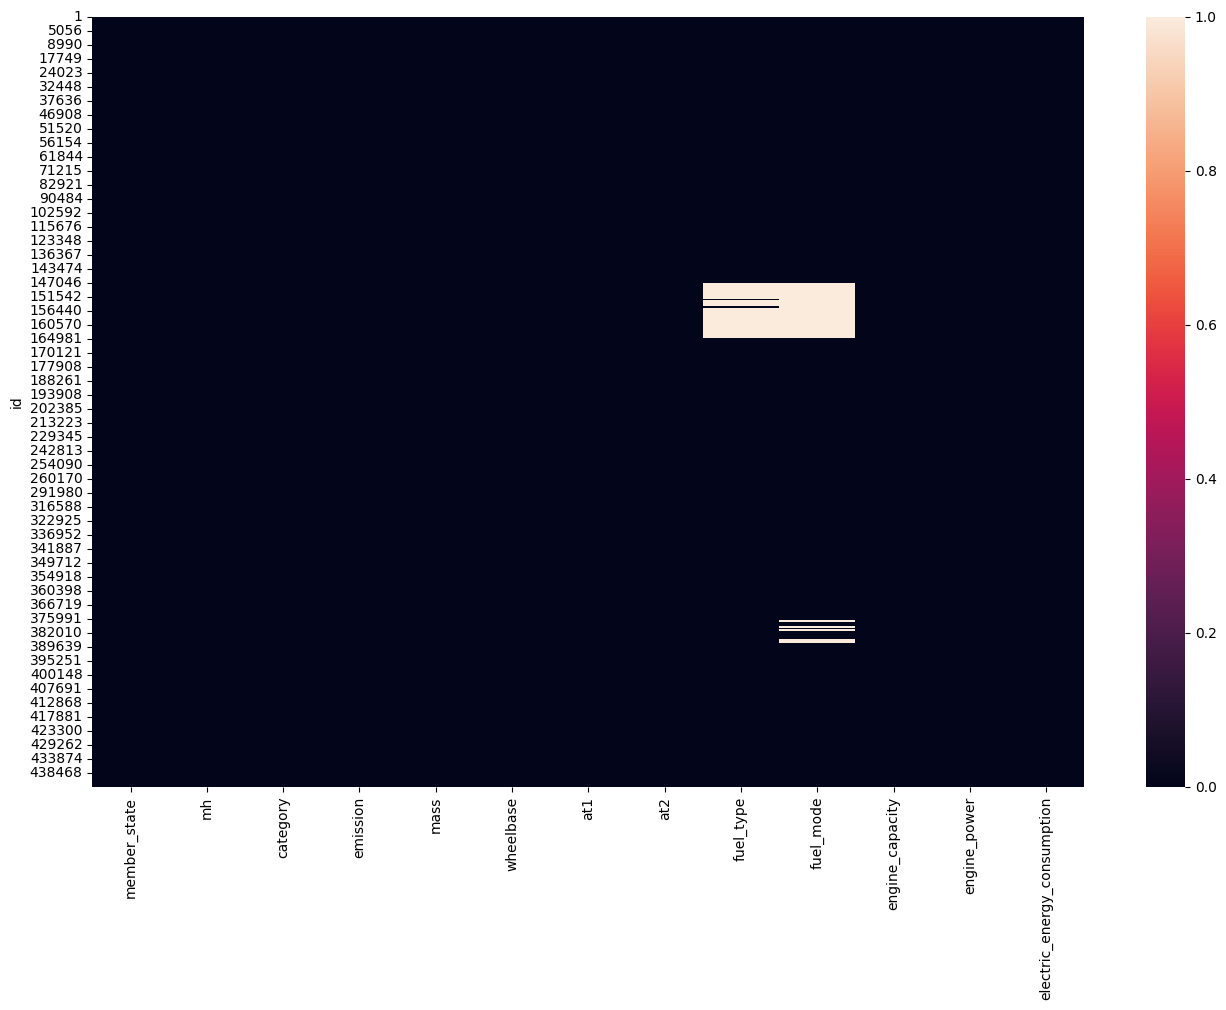

In [71]:
plot_na_distribution(df)

\
Devide the data frame `df` to 2 parts, one for **qualitative** columns, the other one **qantative** columns and check the **missing values count** of each column:

In [72]:
# Divide df to quality and quantity dfs
quality_df = df.select_dtypes(['string', 'object', 'category'])
numeric_df = df.select_dtypes(['int64', 'float64'])

There are some **missing values** in `category`, `fuel_type` and `fuel_mode` columns:

In [73]:
df.isnull().sum()

member_state                       0
mh                                 0
category                           3
emission                           0
mass                               0
wheelbase                          0
at1                                0
at2                                0
fuel_type                      10246
fuel_mode                      12680
engine_capacity                    0
engine_power                       0
electric_energy_consumption        0
dtype: int64

Let's replace NaNs in the **category** column with the **mode** of column:

In [74]:
df.fillna(value={
    'category': df['category'].mode()[0],
    'fuel_mode': df['fuel_mode'].mode()[0],
    'fuel_type': df['fuel_type'].mode()[0]
}, inplace=True)
## or:
# df.loc[df['category'].isnull(), 'category'] = df['category'].mode()[0]
# df.loc[df['fuel_mode'].isnull(), 'fuel_mode'] = df['fuel_mode'].mode()[0]
# df.loc[df['fuel_type'].isnull(), 'fuel_type'] = df['fuel_type'].mode()[0]

In [75]:
df.isnull().sum()

member_state                   0
mh                             0
category                       0
emission                       0
mass                           0
wheelbase                      0
at1                            0
at2                            0
fuel_type                      0
fuel_mode                      0
engine_capacity                0
engine_power                   0
electric_energy_consumption    0
dtype: int64

As cleaning data and replacing missing values in dataset can be a time consuming process, we save the result of our data cleaning process for our next uses:

In [63]:
df.to_csv('processed_dataset.csv')

## Modeling

At this stage, in order to prepare data for modelig, we read the almost preprocessed data and try to apply more preprocessing functions such as encoding the categoical columns, standardizing quantical columns, ... on them :


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler # perfered for datasets with outliers and extreme values


df = pd.read_csv("./processed_dataset.csv")
df = df.set_index('id')
#df.drop('id', axis=1, inplace=True)

print("Drop total duplicates: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Encoding categorical columns `fuel_type` and `fuel_mode` using one-hot encoding 
df = pd.get_dummies(
    df,
    prefix=['ft', 'fm'], # ignore: category, member_state, mh
    columns = ['fuel_type', 'fuel_mode'],
    drop_first=True,
    dtype='int')

y = df.emission
X = df.drop('emission', axis=1).loc[:, 'mass':]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rs = RobustScaler()
standardized_X_columns = ['mass', 'wheelbase', 'at1', 'at2', 'engine_capacity', 'engine_power', 'electric_energy_consumption']
standardized_X_train_data = rs.fit_transform(X_train[standardized_X_columns])
standardized_X_train = pd.DataFrame(standardized_X_train_data, columns=standardized_X_columns)
standardized_X_train.index = X_train.index

standardized_X_test_data =  rs.transform(X_test[standardized_X_columns])
standardized_X_test = pd.DataFrame(standardized_X_test_data, columns=standardized_X_columns)
standardized_X_test.index = X_test.index

def metrics_scikit_learn(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    return mse, rmse, mae


Drop total duplicates:  922


For our regression modeling, we use tree algorithms: **Decision Tree Regressor**, **Linear Regression** and **Random Forest**.

#### Decision Tree Regressor

We here use **regression tree** to model our dataset. it is a simple algorithm that does not require any pre-processing on the dataset. we use `max_depth=3` to avoid both challenges for our demonstration porpuses. first, a readable tree plot with proper sized for interpretering easier. second, to avoid overfitting, `max_depth` with lower value is prefered:


Score on training set: 0.6457648371296988
Score on test set: 0.6305053342015609


mse       rmse        mae
train  622.363628  24.947217  18.274389
test   619.107299  24.881867  18.366372

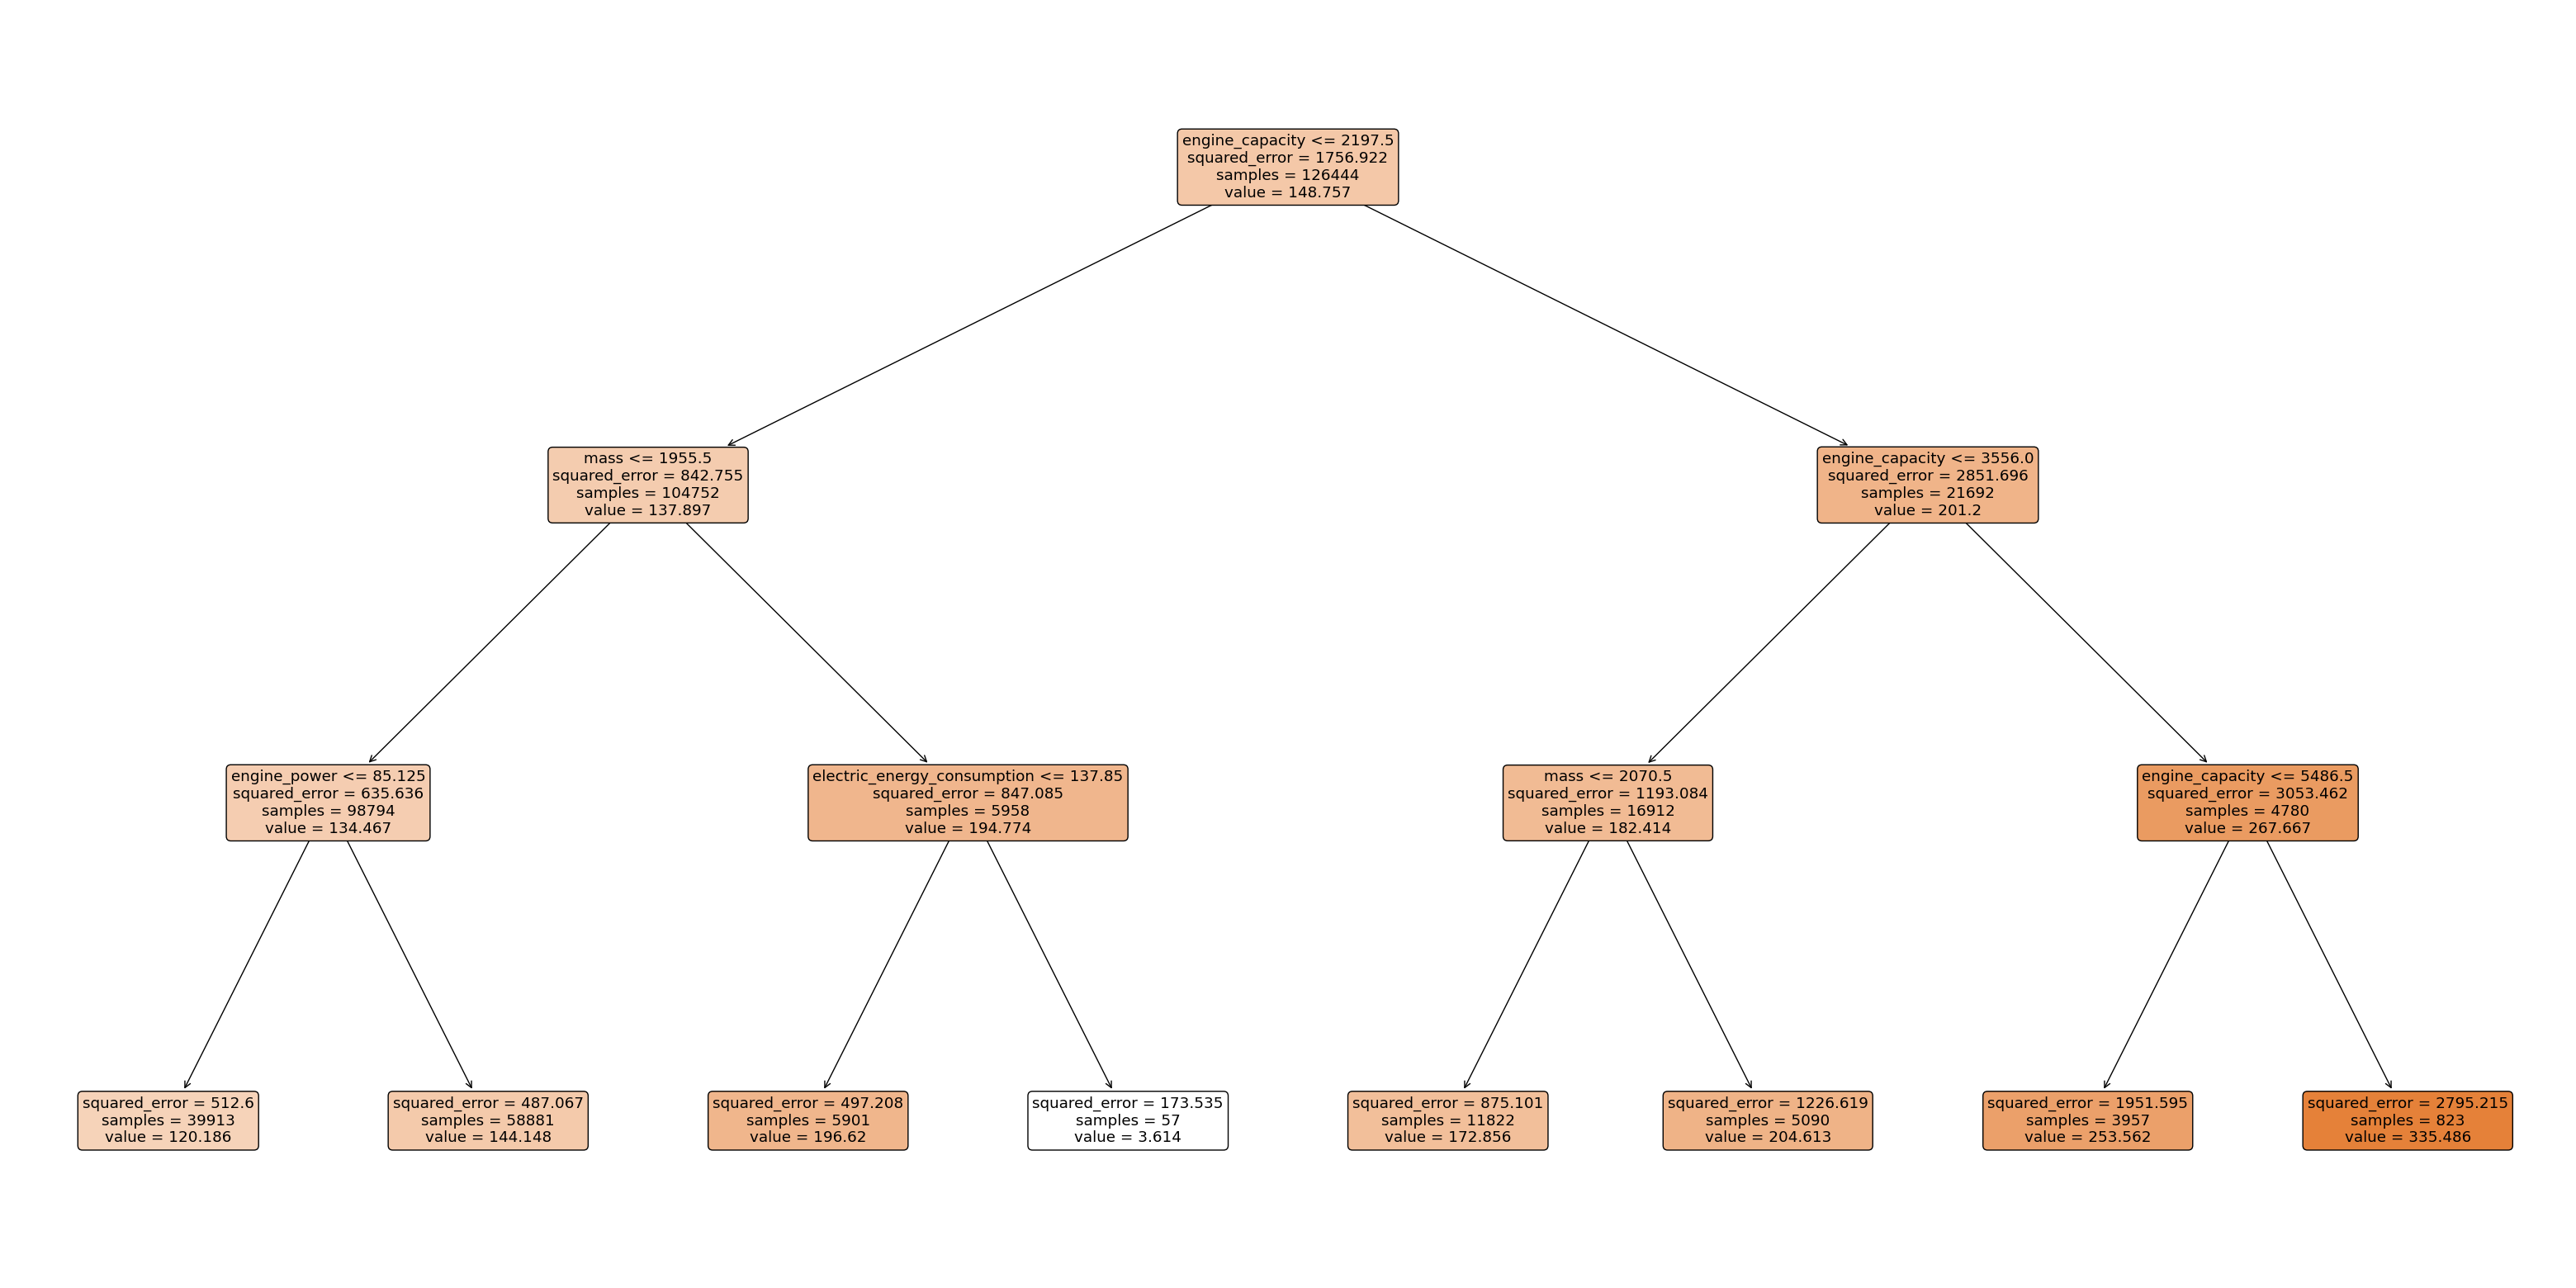

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=3)
dtr = dtr.fit(X_train, y_train)

print('Score on training set:', dtr.score(X_train, y_train))
print('Score on test set:', dtr.score(X_test, y_test))

mse_train, rmse_train, mae_train = metrics_scikit_learn(y_train, dtr.predict(X_train))
mse_test, rmse_test, mae_test = metrics_scikit_learn(y_test, dtr.predict(X_test))

metrics_df = pd.DataFrame({
    "mse": [mse_train, mse_test],
    "rmse": [rmse_train, rmse_test],
    "mae": [mae_train, mae_test]
}, index=["train", "test"])

display(metrics_df)

fig, ax = plt.subplots(figsize=(40, 20))
plot_tree(dtr, filled=True, rounded=True, feature_names=X_test.columns)
#plt.savefig('plot_tree.png')
plt.show()

The closer the score to 1, the closer the data fit to the regression line.

In [41]:
print('Root value:', y_train.mean())
print('the first most left node value:', y_train[X_train.engine_capacity <= 2197.5].mean())
print('the first most right node value:', y_train[X_train.engine_capacity > 2197.5].mean())
print('the right child of the first most left node value:', y_train[(X_train.mass > 1955.5) & (X_train.engine_capacity <= 2197.5)].mean())

Root value: 148.75690621935402
the first most left node value: 137.89702821903163
the first most right node value: 201.19992393509128
the right child of the first most left node value: 194.7737915407855


1. The root node, the node at the top of the tree, contains all the samples of the training set, there are 127181 samples: `samples=127181`.

    The first test that will be performed corresponds to `engine_capacity <= 2197.5`. We then look at the value for each sample. All the samples for which the variable `engine_capacity` is less than equal to the threshold, go in the left child node, if not in the right child node.
    
    The parameter `value` (148.761) indicates the mean of target value `emission` in `y_train` before any separation.
    
    Finally, for this regression problem, the error is calculated using the Mean Squared Error (MSE). Squares the distances from the points to the regression line. A smaller MSE indicates a more precise regression line.
    
    The objective of our model is to predict our target (`emission`) value  as well as possible, so we want to end up with nodes as lowest MSE as possible.

2. We remind that the child nodes are the intermediate nodes of the tree. In the first left child node, There are 105263 samples in the training set (samples=105263). The application of the condition (`engine_capacity <= 2197.5`) described in the root node, allows us to compute the value (the mean target value form `y_train[(X_train.engine_capacity <= 2197.5].mean()`).

3. The separations follow until the leaves, the terminal nodes, are obtained. The predicted value for the samples belonging to the leaf is showing the `emission` The **color** code is as follows: the higher the value is the intence the **Orange** is.  



Finally, the variables that enabled the regression of the samples, ranked in order, are `engine_capacity`, `mass`, `engine_power` and `electric_energy_consumption`. The higher a variable is placed in the tree, the more important it played a role in the regression.


Instead of displaying the tree, or in addition to this analysis, it is possible to study the **"feature importances"** of the model. This attribute of the model class, called feature_importances_, allows to classify the variables according to the role they played in the prediction value of the model. The sum of these values is 1:


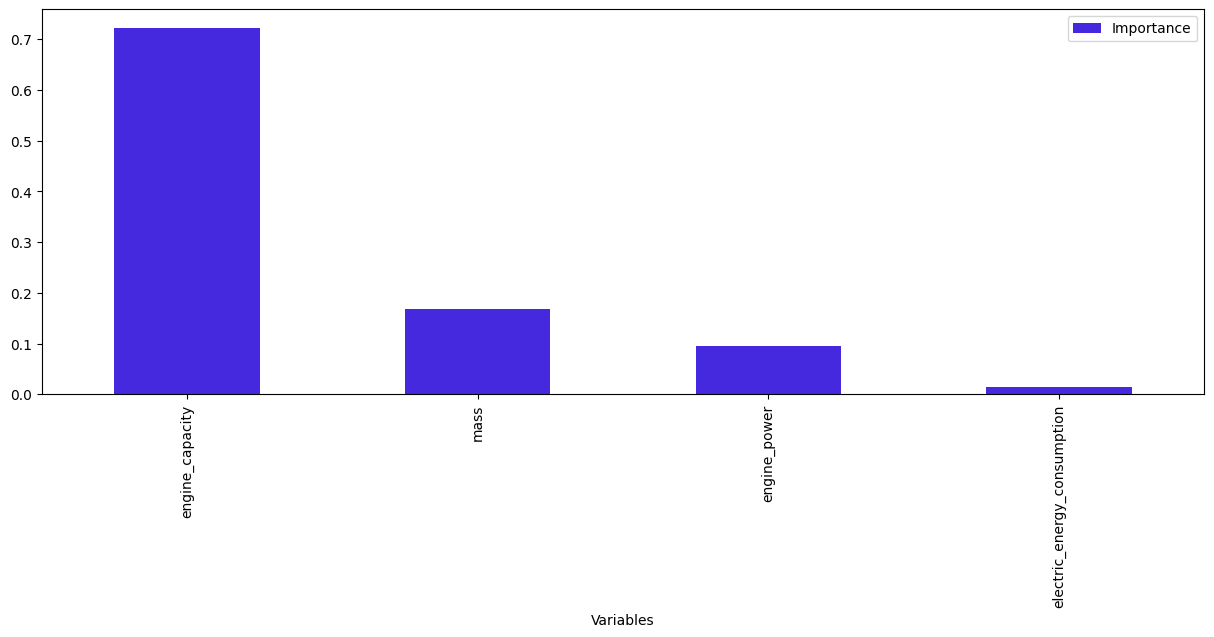

In [42]:
%matplotlib inline

feat_importances = pd.DataFrame({
    "Variables": X_test.columns,
    "Importance":
    dtr.feature_importances_
}).sort_values(by='Importance', ascending=False)


feat_importances.nlargest(4, "Importance").plot.bar(x="Variables",
                                                    y="Importance",
                                                    figsize=(15, 5),
                                                    color="#4529de");


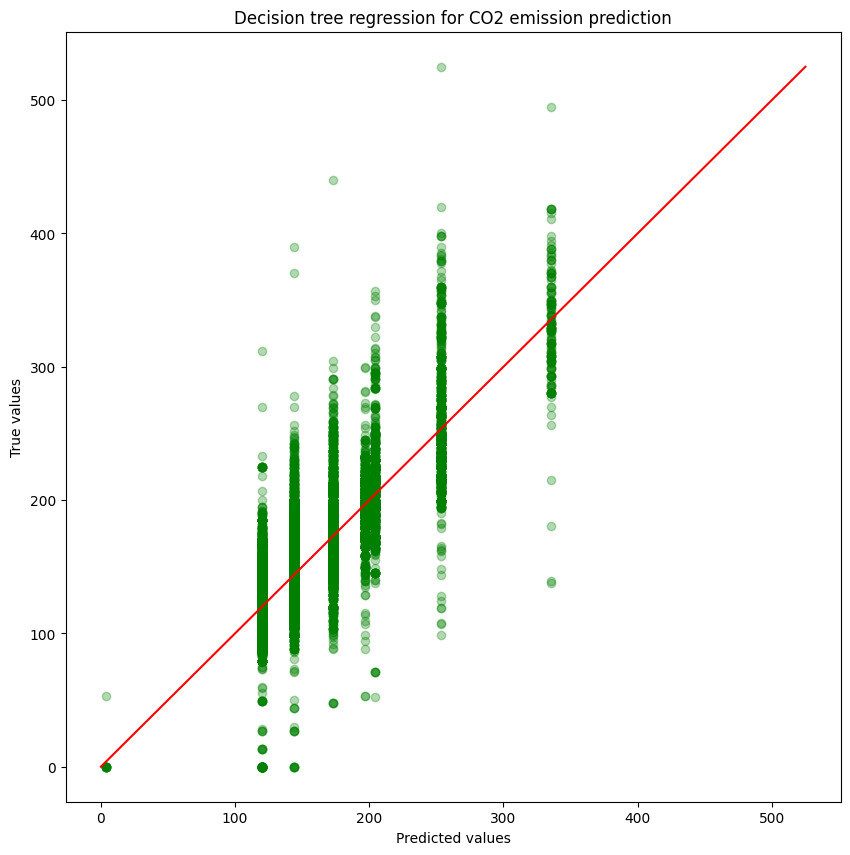

In [44]:
# Insert your code
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
pred_test = dtr.predict(X_test)
plt.scatter(pred_test, y_test, c='green', alpha=.3)

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')

plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title('Decision tree regression for CO2 emission prediction')

plt.show()

#### Linear regression

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

print('Score on training set:', lr.score(X_train, y_train))
print('Score on test set:', lr.score(X_test, y_test))

mse_train, rmse_train, mae_train = metrics_scikit_learn(y_train, lr.predict(X_train))
mse_test, rmse_test, mae_test = metrics_scikit_learn(y_test, lr.predict(X_test))

metrics_df = pd.DataFrame({
    "mse": [mse_train, mse_test],
    "rmse": [rmse_train, rmse_test],
    "mae": [mae_train, mae_test]
}, index=["train", "test"])

display(metrics_df)

Score on training set: 0.7243474423251586
Score on test set: 0.7119958062780608


mse       rmse        mae
train  484.300103  22.006819  15.776396
test   482.565825  21.967381  15.835949


##### The interpretation of the Linear Regression model

Interpreting linear regression model coefficients involves the following steps:

- **Size of Coefficient:** The size of the coefficient for each independent variable indicates the effect that variable has on the dependent variable.
- **Sign of Coefficient:** The sign (positive or negative) of the coefficient indicates the direction of the effect.
- **Residual Plots:** Before interpreting coefficients, if check residual plots to ensure unbiased estimates. in our case plotting a multi variable regression is not possible.

the coefficients of the linear regression model are interpretable. The estimated coefficients
  quantify the relationship between the target variable `emission` and the explanatory variables `mass`, `wheelbase`, `at1`, `at2`, `engine_capacity`, `engine_power`, ....
  
The constant intercept captures all the information not explained by the explanatory variables. In our case we can interpret the coefficients as follows:
* when `mass` increases by one unit then y increases (or decreases) on average by its coefficient units if its coefficient is positive (or negative).
* when `wheelbase` increases by one unit then y increases (or decreases) on average by its coefficient units if its coefficient is positive (or negative).
* ...

Once the parameters of the model have been estimated, we can use them to predict the target variable, thanks to the predict method.


intercept:  41.45250048525128
mass =  0.067
wheelbase = -0.004
at1 =  0.009
at2 = -0.034
engine_capacity =  0.024
engine_power =  0.006
electric_energy_consumption = -0.445
ft_DIESEL = -3.817
ft_DIESEL-ELECTRIC = -25.307
ft_E85 =  45.484
ft_ELECTRIC = -16.454
ft_HYDROGEN = -140.327
ft_LPG =  19.056
ft_NG-BIOMETHANE = -0.669
ft_PETROL =  25.446
ft_PETROL-ELECTRIC = -13.915
fm_flex-fuel = -10.831
fm_mono-fuel = -3.382


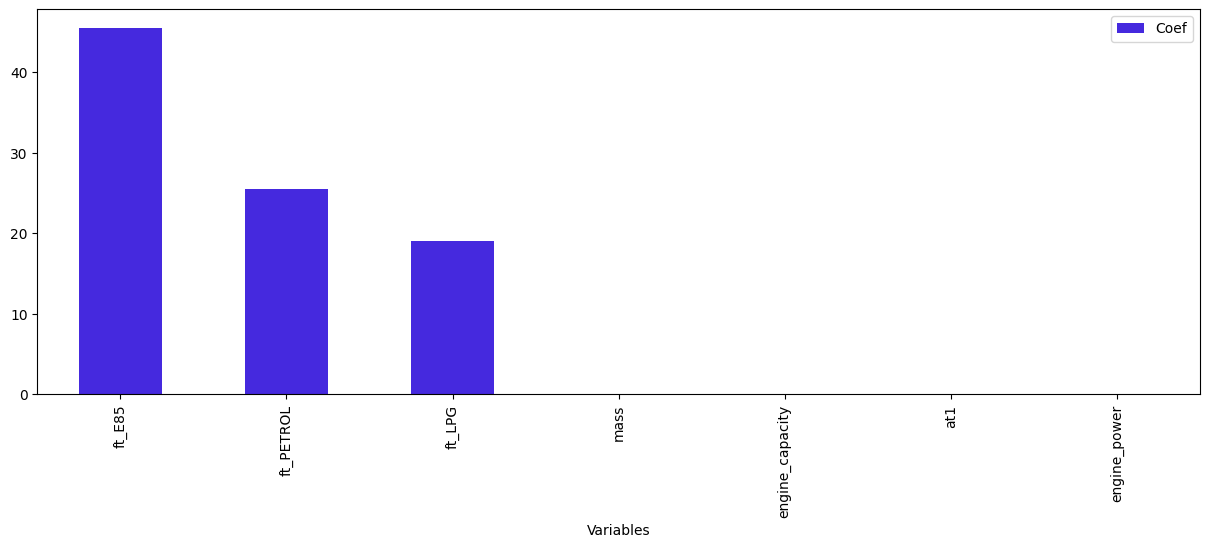

In [45]:
print('intercept: ', lr.intercept_)

for fn, coef in zip(lr.feature_names_in_, lr.coef_):
    print(f"{fn} = {coef: .3f}") 

lr_df = pd.DataFrame({
    'Variables': lr.feature_names_in_,
    'Coef': lr.coef_}).nlargest(7, 'Coef').plot.bar(x="Variables",
                                                    y="Coef",
                                                    figsize=(15, 5),
                                                    color="#4529de");

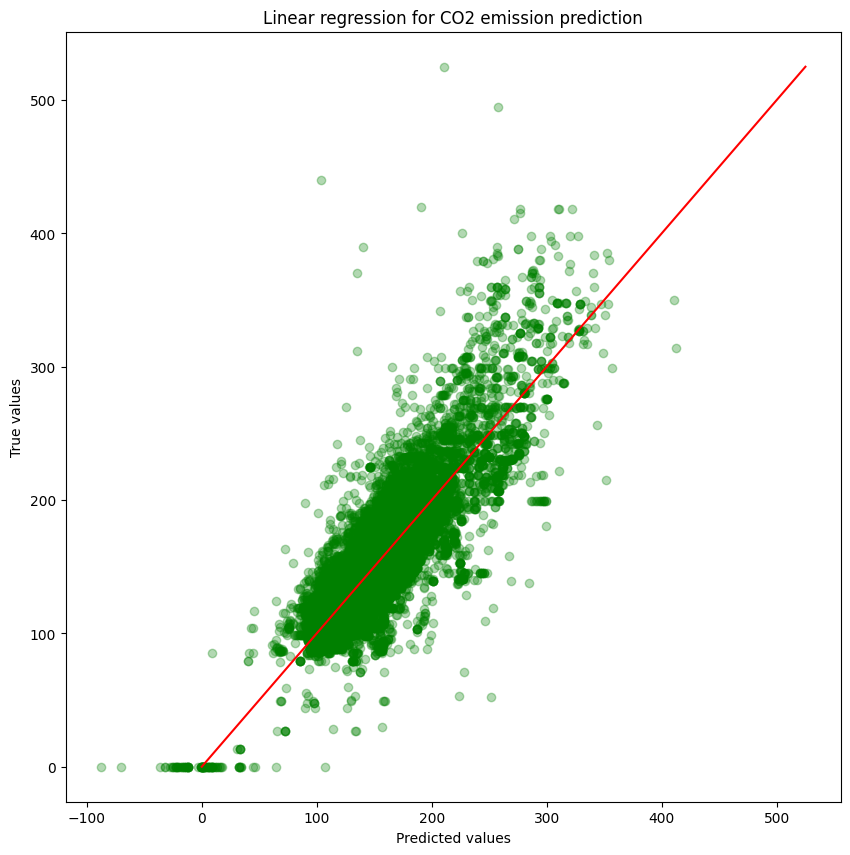

In [48]:
# Insert your code
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test, c='green', alpha=.3)

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')

plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title('Linear regression for CO2 emission prediction')

plt.show()

We observe that some electric cars are overstimated. on the other hand, the highest emissions producers (vehicles) are generally underestimated.

The interesting point is that there are some **negative predicted emission values** which represnt **electric vehicles** (their true emission values is 0):

In [49]:
pred_test[pred_test < 0]

array([-2.74260916e+01, -2.09721688e+01, -7.65641007e-01, -1.96343952e+01,
       -1.35492710e+01, -2.95489161e-01, -1.33947233e+01, -2.13066122e+01,
       -2.09721688e+01, -2.11373601e-01, -1.95012615e-01, -1.15426106e+01,
       -6.98287614e+01, -2.63166735e+01, -3.64085377e+01, -3.41014524e+00,
       -2.26443857e+01, -2.95489161e-01, -1.15426106e+01, -8.77361424e+01,
       -1.42108547e-13, -2.21203873e+01, -1.21704368e+01, -1.52214879e+01,
       -2.26443857e+01, -1.35492710e+01, -1.15426106e+01, -2.95489161e-01,
       -6.98752329e-01, -2.47080508e+01, -3.16400414e+01, -1.75112151e+01,
       -1.81889845e+01, -1.15426106e+01, -1.52214879e+01, -9.67542296e-02,
       -2.49788999e+01, -1.42108547e-13, -2.33981911e+01, -1.15426106e+01,
       -1.15426106e+01, -1.52214879e+01, -3.16400414e+01, -1.70462262e+01])

#### Random Forest Regressor

Let's use a last model, the Random Forest in order to multiply the models and choose the best one.

In [50]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

print('Score on training set', rfr.score(X_train, y_train))
print('Score on test set', rfr.score(X_test, y_test))

mse_train, rmse_train, mae_train = metrics_scikit_learn(y_train, rfr.predict(X_train))
mse_test, rmse_test, mae_test = metrics_scikit_learn(y_test, rfr.predict(X_test))

metrics_df = pd.DataFrame({
    "mse": [mse_train, mse_test],
    "rmse": [rmse_train, rmse_test],
    "mae": [mae_train, mae_test]
}, index=["train", "test"])

display(metrics_df)

Score on training set 0.9846633998120659
Score on test set 0.9368658485174203


mse       rmse       mae
train   26.945214   5.190878  2.550709
test   105.784515  10.285160  4.581812

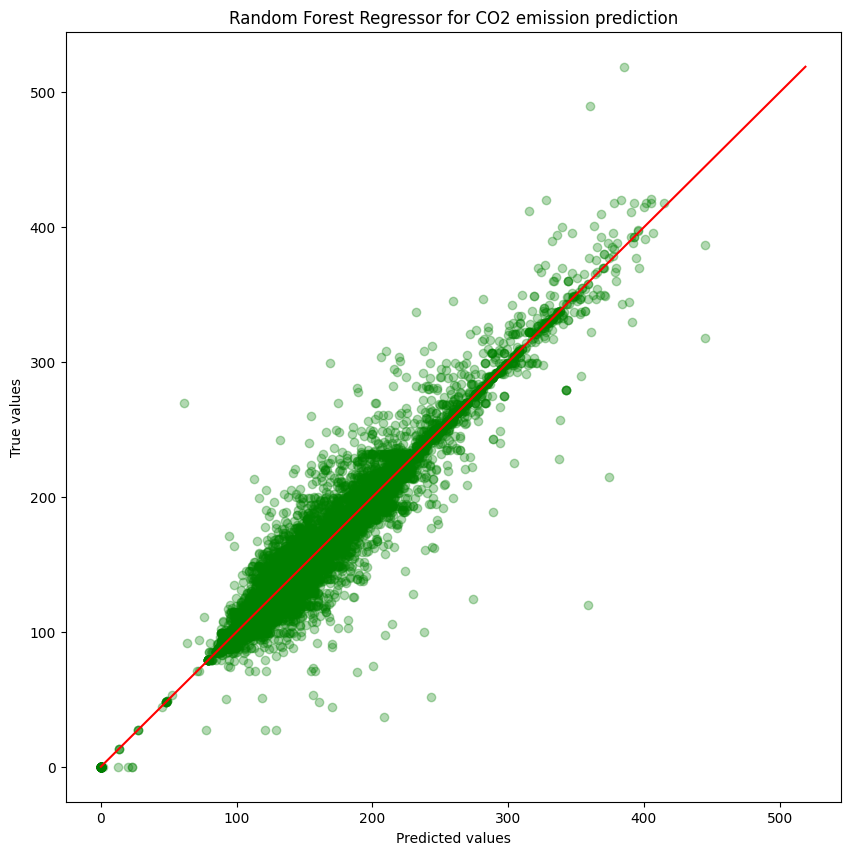

In [62]:
# Insert your code
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
pred_test = rfr.predict(X_test)
plt.scatter(pred_test, y_test, c='green', alpha=.3)

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')

plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title('Random Forest Regressor for CO2 emission prediction')

plt.show()

##### Linear Regression vs Decision Tree Regressor vs Random Forest Regressor 
<br>

We observe that **Random Forest Regressor** got higher accuracy (around **94%**) than Linear Regression and Decision Tree Regressor here.  **Linear Regression (LR)** has an accuracy around **72%** which is almost **8%** better than **64%** accuracy of **the Decision Tree Regressor (DTR)** with max depth 3.